<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Gestión de Outliers

AutoRenew, la empresa líder en la venta de coches de segunda mano, sigue adelante con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Este modelo es clave para mejorar las estrategias de ventas, marketing y optimización del inventario de la empresa. Ya has realizado un análisis exploratorio inicial y gestionado los valores nulos en el conjunto de datos. Ahora, es el momento de abordar otro aspecto crucial del preprocesamiento: la **gestión de outliers**.

En este laboratorio, te enfocarás en identificar y gestionar los outliers (valores atípicos) presentes en el conjunto de datos. Los outliers pueden distorsionar los resultados de un análisis y afectar negativamente el rendimiento de los modelos predictivos, por lo que es fundamental tratarlos adecuadamente antes de proceder con las siguientes fases del proyecto.


**Instrucciones:**

1. **Identificación de Outliers:** Explora las columnas clave del conjunto de datos (como `price`, `powerCV`, `kilometer`, etc.) para identificar posibles outliers. Utiliza gráficos como diagramas de caja (boxplots) y análisis estadísticos para detectar valores que se desvíen significativamente del resto de los datos.

2. **Análisis de Outliers:** Una vez identificados, analiza los outliers para determinar si son errores de datos, valores extremos válidos o resultados de condiciones específicas que deben ser tenidos en cuenta. Considera el contexto de cada columna al evaluar la relevancia de estos valores atípicos.

3. **Gestión de Outliers:** Decide la estrategia más adecuada para manejar los outliers. Esto podría incluir la eliminación de los outliers, la transformación de los datos, o la aplicación de técnicas de imputación. Justifica tu elección basándote en cómo los outliers podrían afectar el modelo predictivo.

**Nota:** Recuerda que este laboratorio es parte de una serie de actividades en las que utilizarás el mismo conjunto de datos a lo largo de la semana. Documenta cuidadosamente los pasos que sigas para que puedas referirte a ellos en las próximas etapas del proyecto.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
import sys
sys.path.append("../")
from src import soporte_outliers as so


In [2]:
df = pd.read_csv("../data/autorenew_clean_estandar.csv", index_col=0)

In [3]:
df.head()

name   seller offerType abtest vehicleType  \
0                      Golf_3_1.6  private     offer   test     Unknown   
1            A5_Sportback_2.7_Tdi  private     offer   test       coupe   
2  Jeep_Grand_Cherokee_"Overland"  private     offer   test         suv   
3              GOLF_4_1_4__3TÜRER  private     offer   test   small car   
4  Skoda_Fabia_1.4_TDI_PD_Classic  private     offer   test   small car   

     gearbox    model fuelType       brand notRepairedDamage  ...  \
0   manually     golf   petrol  volkswagen           Unknown  ...   
1   manually  Unknown   diesel        audi               yes  ...   
2  automatic    grand   diesel        jeep           Unknown  ...   
3   manually     golf   petrol  volkswagen                no  ...   
4   manually    fabia   diesel       skoda                no  ...   

  yearOfRegistration_Ratesrobust powerCV_min_max  kilometer_min_max  \
0                      -1.111111        0.000000           1.000000   
1                       0.888889        0.009480           0.827586   
2                       0.111111        0.008162           0.827586   
3                      -0.222222        0.003751           1.000000   
4                       0.555556        0.003447           0.586207   

   yearOfRegistration_min_max  powerCV_norm  kilometer_norm  \
0                    0.110346      0.000000        0.999912   
1                    0.112346      0.001496        0.999869   
2                    0.111568      0.001288        0.999871   
3                    0.111235      0.000493        0.999911   
4                    0.112012      0.000755        0.999751   

   yearOfRegistration_norm  powerCV_estandar  kilometer_estandar  \
0                 0.013285         -0.601340            0.607813   
1                 0.016086          0.385348           -0.015437   
2                 0.016030          0.248162           -0.015437   
3                 0.013339         -0.210886            0.607813   
4                 0.022306         -0.242544           -0.887987   

   yearOfRegistration_estandar  
0                    -0.124672  
1                     0.069147  
2                    -0.006227  
3                    -0.038530  
4                     0.036844  

[5 rows x 31 columns]

In [4]:
df.columns

Index(['name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox',
       'model', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated',
       'lastSeen', 'price_knn', 'yearOfRegistration_knn', 'powerCV_knn',
       'kilometer_knn', 'monthOfRegistration_knn', 'nrOfPictures_knn',
       'postalCode_knn', 'powerCV_robust', 'kilometer_Ratesrobust',
       'yearOfRegistration_Ratesrobust', 'powerCV_min_max',
       'kilometer_min_max', 'yearOfRegistration_min_max', 'powerCV_norm',
       'kilometer_norm', 'yearOfRegistration_norm', 'powerCV_estandar',
       'kilometer_estandar', 'yearOfRegistration_estandar'],
      dtype='object')

In [5]:
df_out = df[['name', 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox',
       'model', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated',
       'lastSeen', 'price_knn', 'monthOfRegistration_knn', 
       'postalCode_knn','powerCV_estandar',
       'kilometer_estandar', 'yearOfRegistration_estandar']]

In [6]:
df_out.head()

name   seller offerType abtest vehicleType  \
0                      Golf_3_1.6  private     offer   test     Unknown   
1            A5_Sportback_2.7_Tdi  private     offer   test       coupe   
2  Jeep_Grand_Cherokee_"Overland"  private     offer   test         suv   
3              GOLF_4_1_4__3TÜRER  private     offer   test   small car   
4  Skoda_Fabia_1.4_TDI_PD_Classic  private     offer   test   small car   

     gearbox    model fuelType       brand notRepairedDamage  \
0   manually     golf   petrol  volkswagen           Unknown   
1   manually  Unknown   diesel        audi               yes   
2  automatic    grand   diesel        jeep           Unknown   
3   manually     golf   petrol  volkswagen                no   
4   manually    fabia   diesel       skoda                no   

           dateCreated             lastSeen  price_knn  \
0  2016-03-24 00:00:00  2016-04-07 03:16:57      480.0   
1  2016-03-24 00:00:00  2016-04-07 01:46:50    18300.0   
2  2016-03-14 00:00:00  2016-04-05 12:47:46     9800.0   
3  2016-03-17 00:00:00  2016-03-17 17:40:17     1500.0   
4  2016-03-31 00:00:00  2016-04-06 10:17:21     3600.0   

   monthOfRegistration_knn  postalCode_knn  powerCV_estandar  \
0                      0.0         70435.0         -0.601340   
1                      5.0         66954.0          0.385348   
2                      8.0         90480.0          0.248162   
3                      6.0         91074.0         -0.210886   
4                      7.0         60437.0         -0.242544   

   kilometer_estandar  yearOfRegistration_estandar  
0            0.607813                    -0.124672  
1           -0.015437                     0.069147  
2           -0.015437                    -0.006227  
3            0.607813                    -0.038530  
4           -0.887987                     0.036844

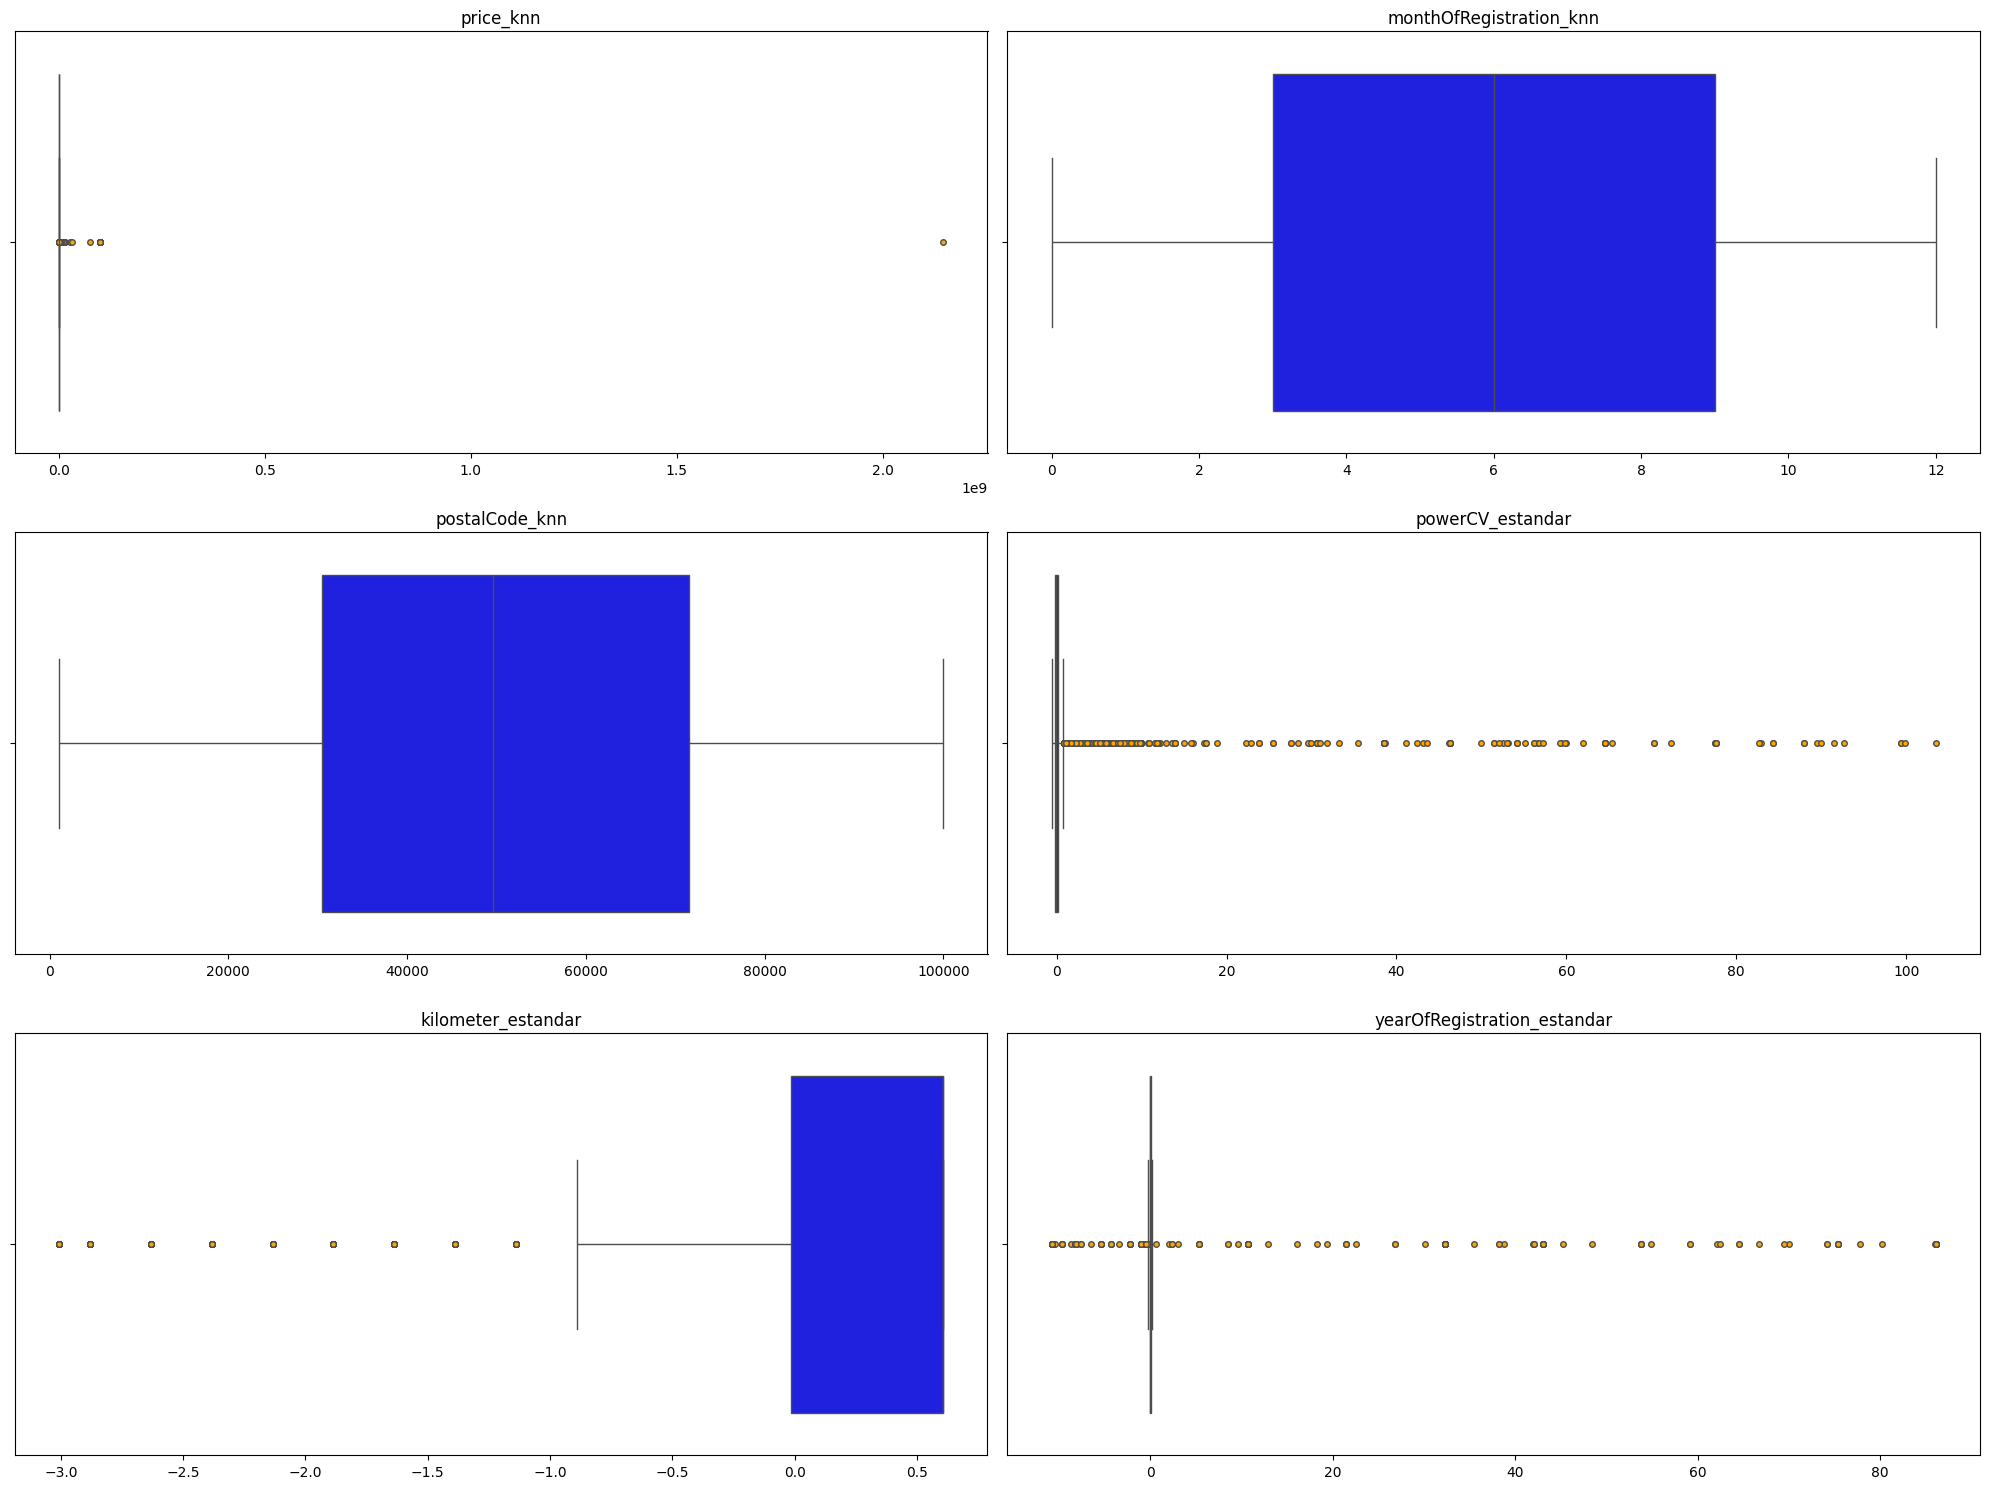

In [7]:
# instanciamos la clase que nos permite identificar y gestionar outliers
gestion = so.GestionOutliersUnivariados(df_out)

# llamamos al método que nos permite identificar outliers univariados de forma visual (histograma y boxplot)
gestion.visualizar_outliers_univariados()

**Debido a que la distribucion no es normal, seguimos con metodo IQR en vez de Z-Score.**

In [8]:
# Antes de seguir con la lección hagamos una recapitulación de los resultados de la identificación de outliers univariados: 
gestion.detectar_outliers(metodo = "iqr")

La cantidad de outliers que tenemos para la columna price_knn es 28106
La cantidad de outliers que tenemos para la columna powerCV_estandar es 10685
La cantidad de outliers que tenemos para la columna kilometer_estandar es 64216
La cantidad de outliers que tenemos para la columna yearOfRegistration_estandar es 7143


{'price_knn':                                                      name   seller offerType  \
 1                                    A5_Sportback_2.7_Tdi  private     offer   
 14      Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...  private     offer   
 33                                          BMW_325i_Aut.  private     offer   
 56                                   BMW_435i_Sport_coupe  private     offer   
 80      Mercedes_Benz_E_250_CDI_Mod.2011_Automatik_NAV...  private     offer   
 ...                                                   ...      ...       ...   
 371445                                BMW_118i_Sport_Line  private     offer   
 371448                        BMW_525d_Touring_Sport_Aut.  private     offer   
 371454  Mercedes_Benz_E_200_CDI_DPF_BlueEFFICIENCY_7G_...  private     offer   
 371471  Volkswagen_Golf_1.4_TSI_BlueMotion_Technology_...  private     offer   
 371498       BMW_M135i_vollausgestattet_NP_52.720____Euro  private     offer   
 
          abt

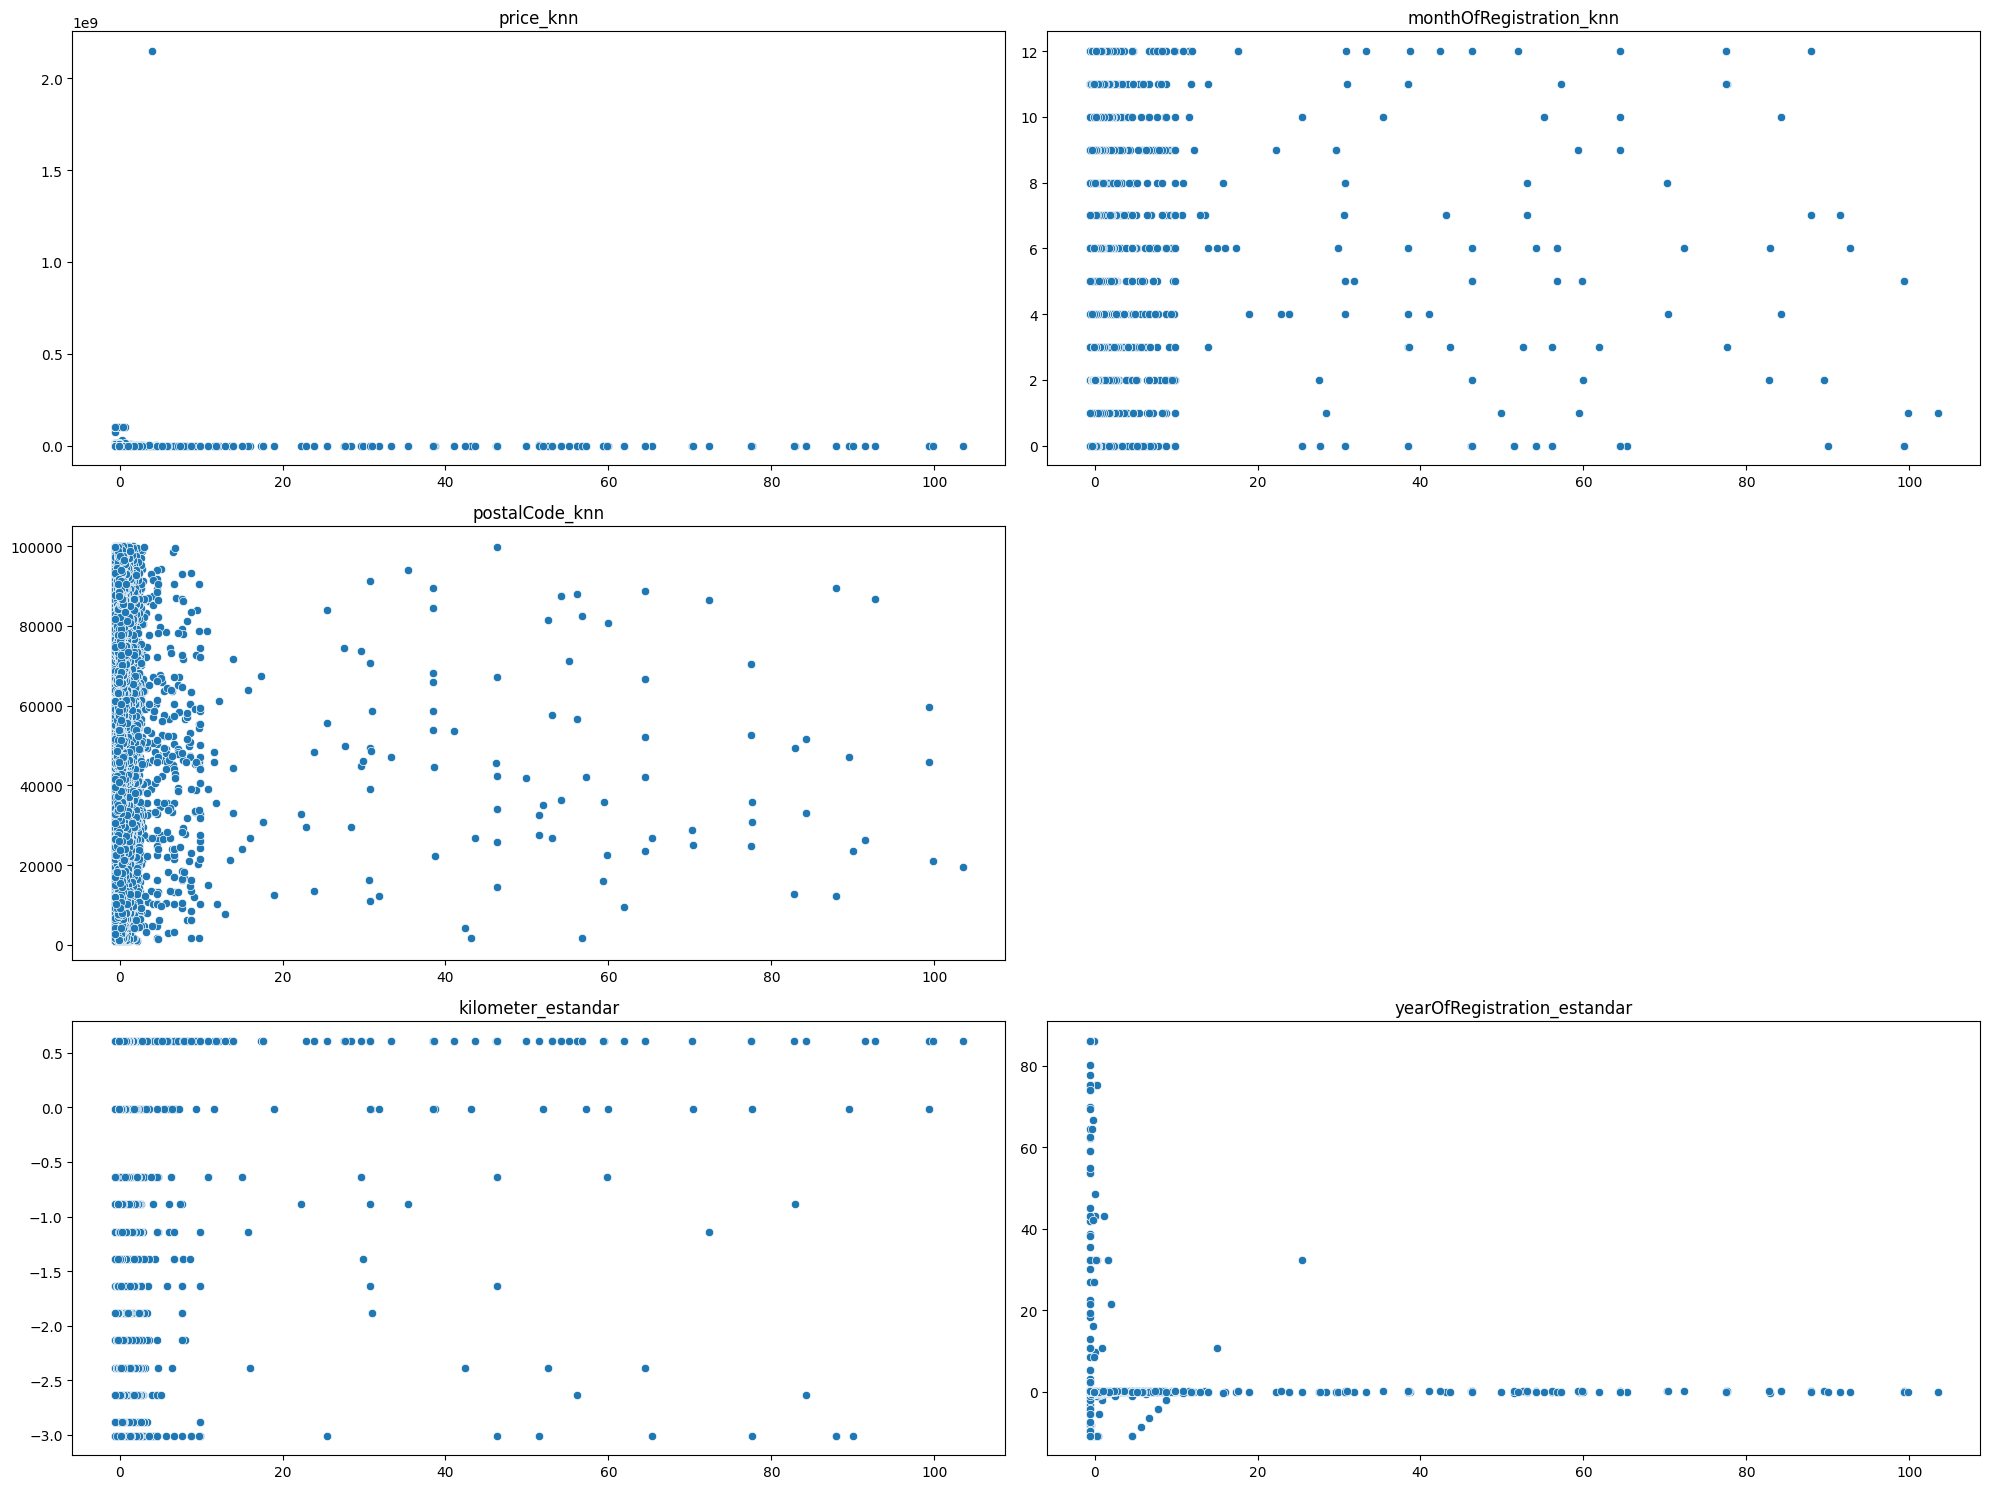

In [9]:
# instanciamos la clase de indentificación de Outliers Multivariados
gestion_multi= so.GestionOutliersMultivariados(df_out)

# llamamos al método que nos permite identificar los outliers
#La cantidad de outliers que tenemos para la columna powerCV_estandar es 10685
gestion_multi.visualizar_outliers_bivariados("powerCV_estandar")

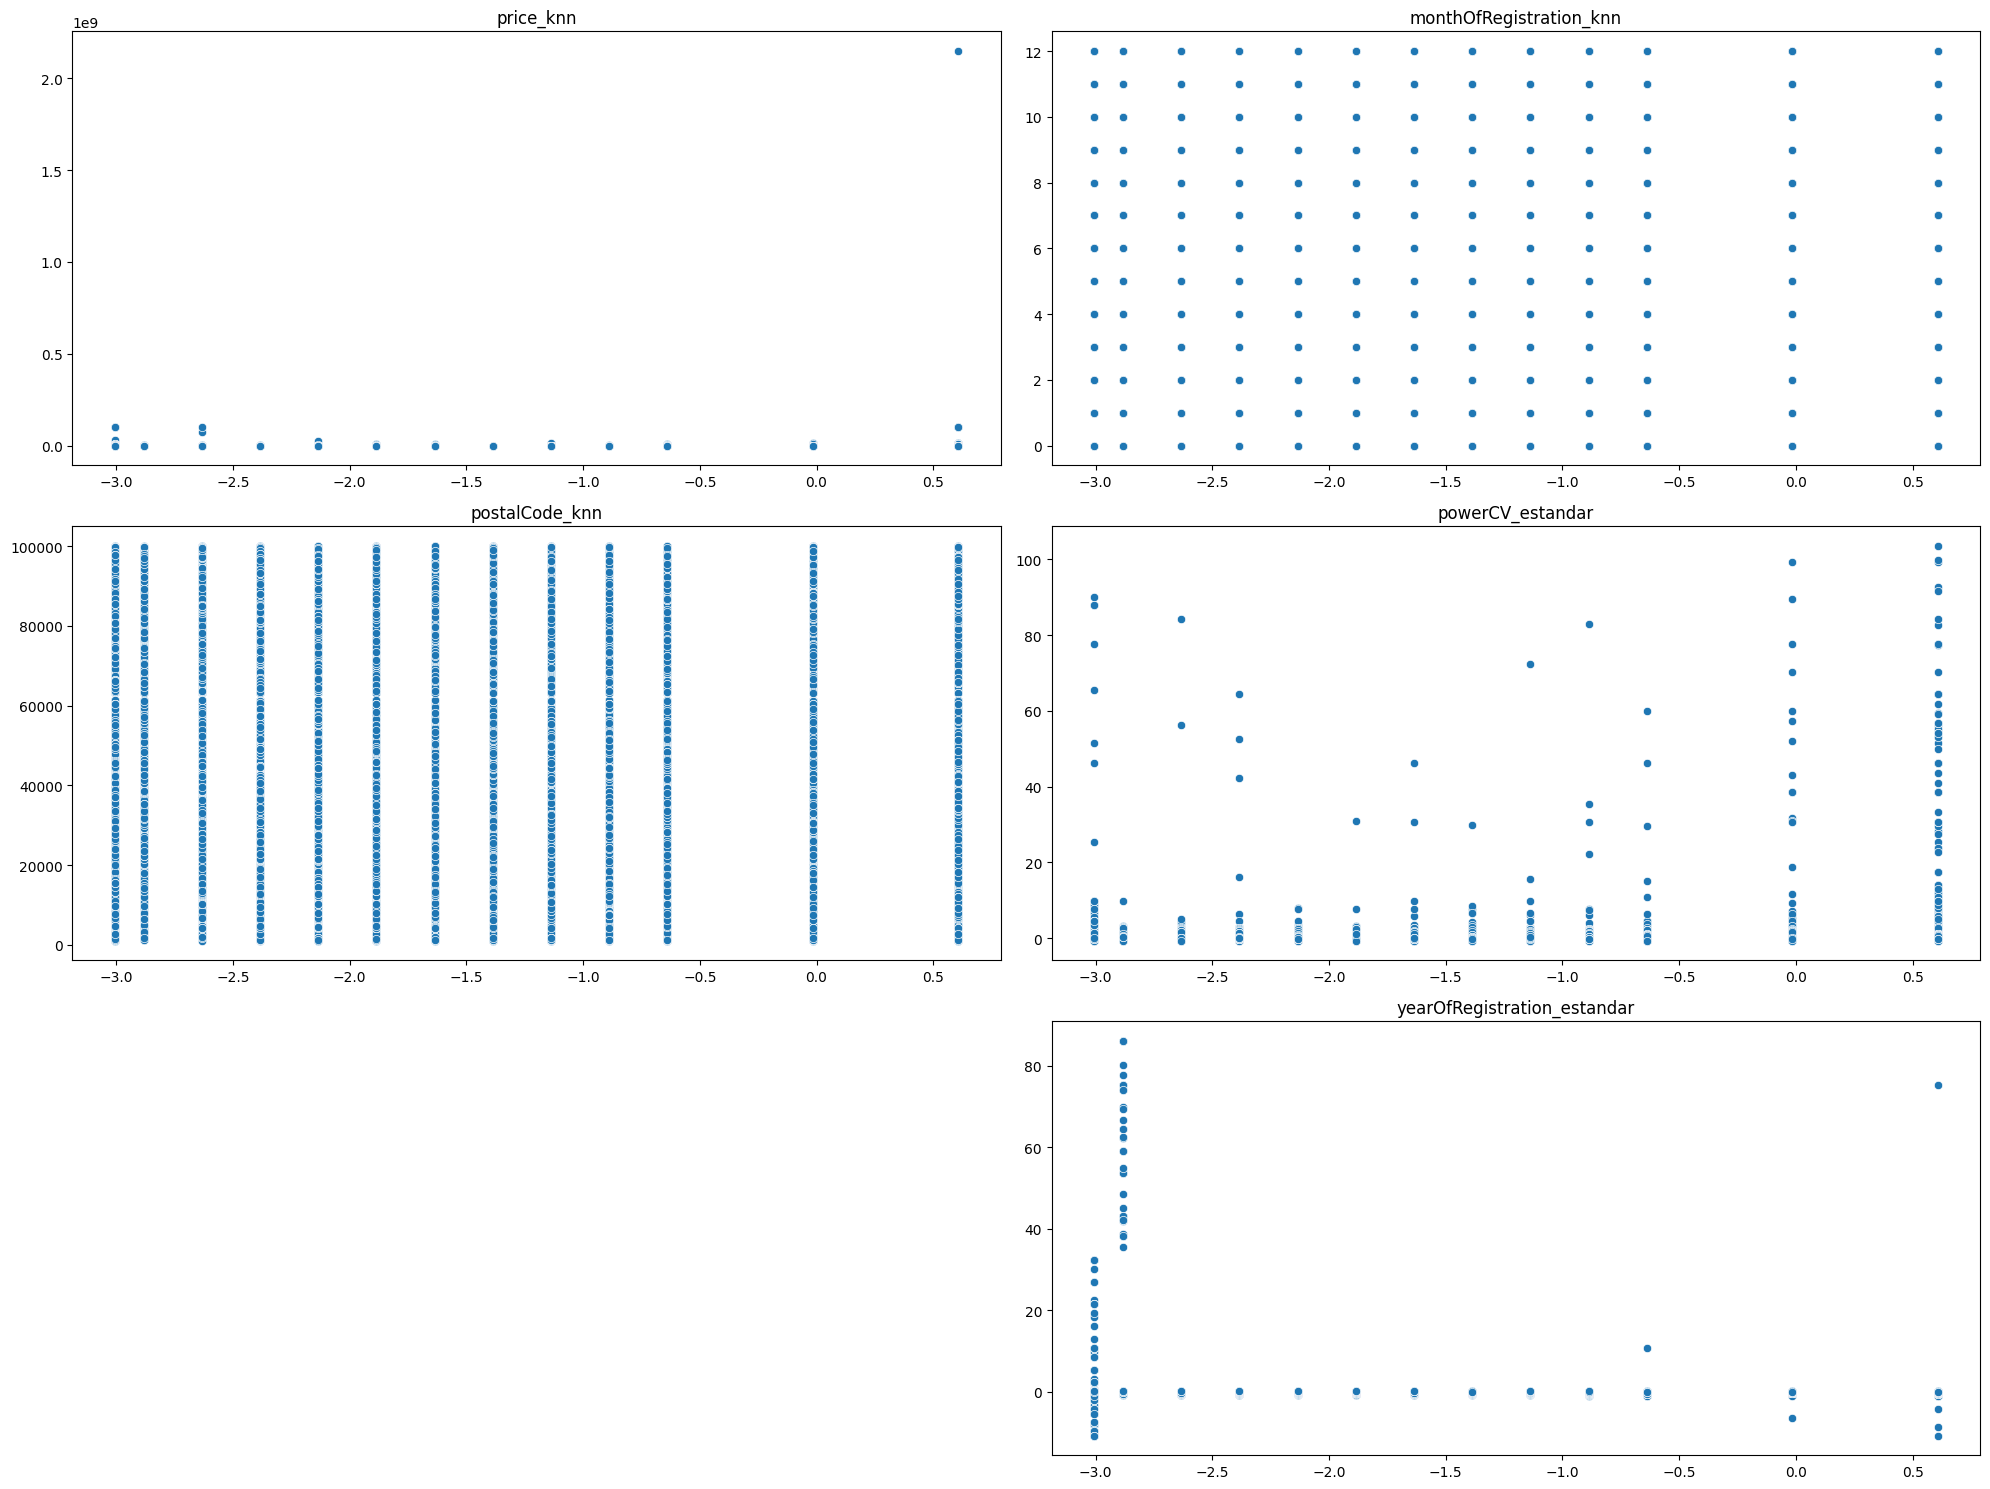

In [10]:
# llamamos al método que nos permite identificar los outliers
#La cantidad de outliers que tenemos para la columna kilometer_estandar es 64216
gestion_multi.visualizar_outliers_bivariados("kilometer_estandar")

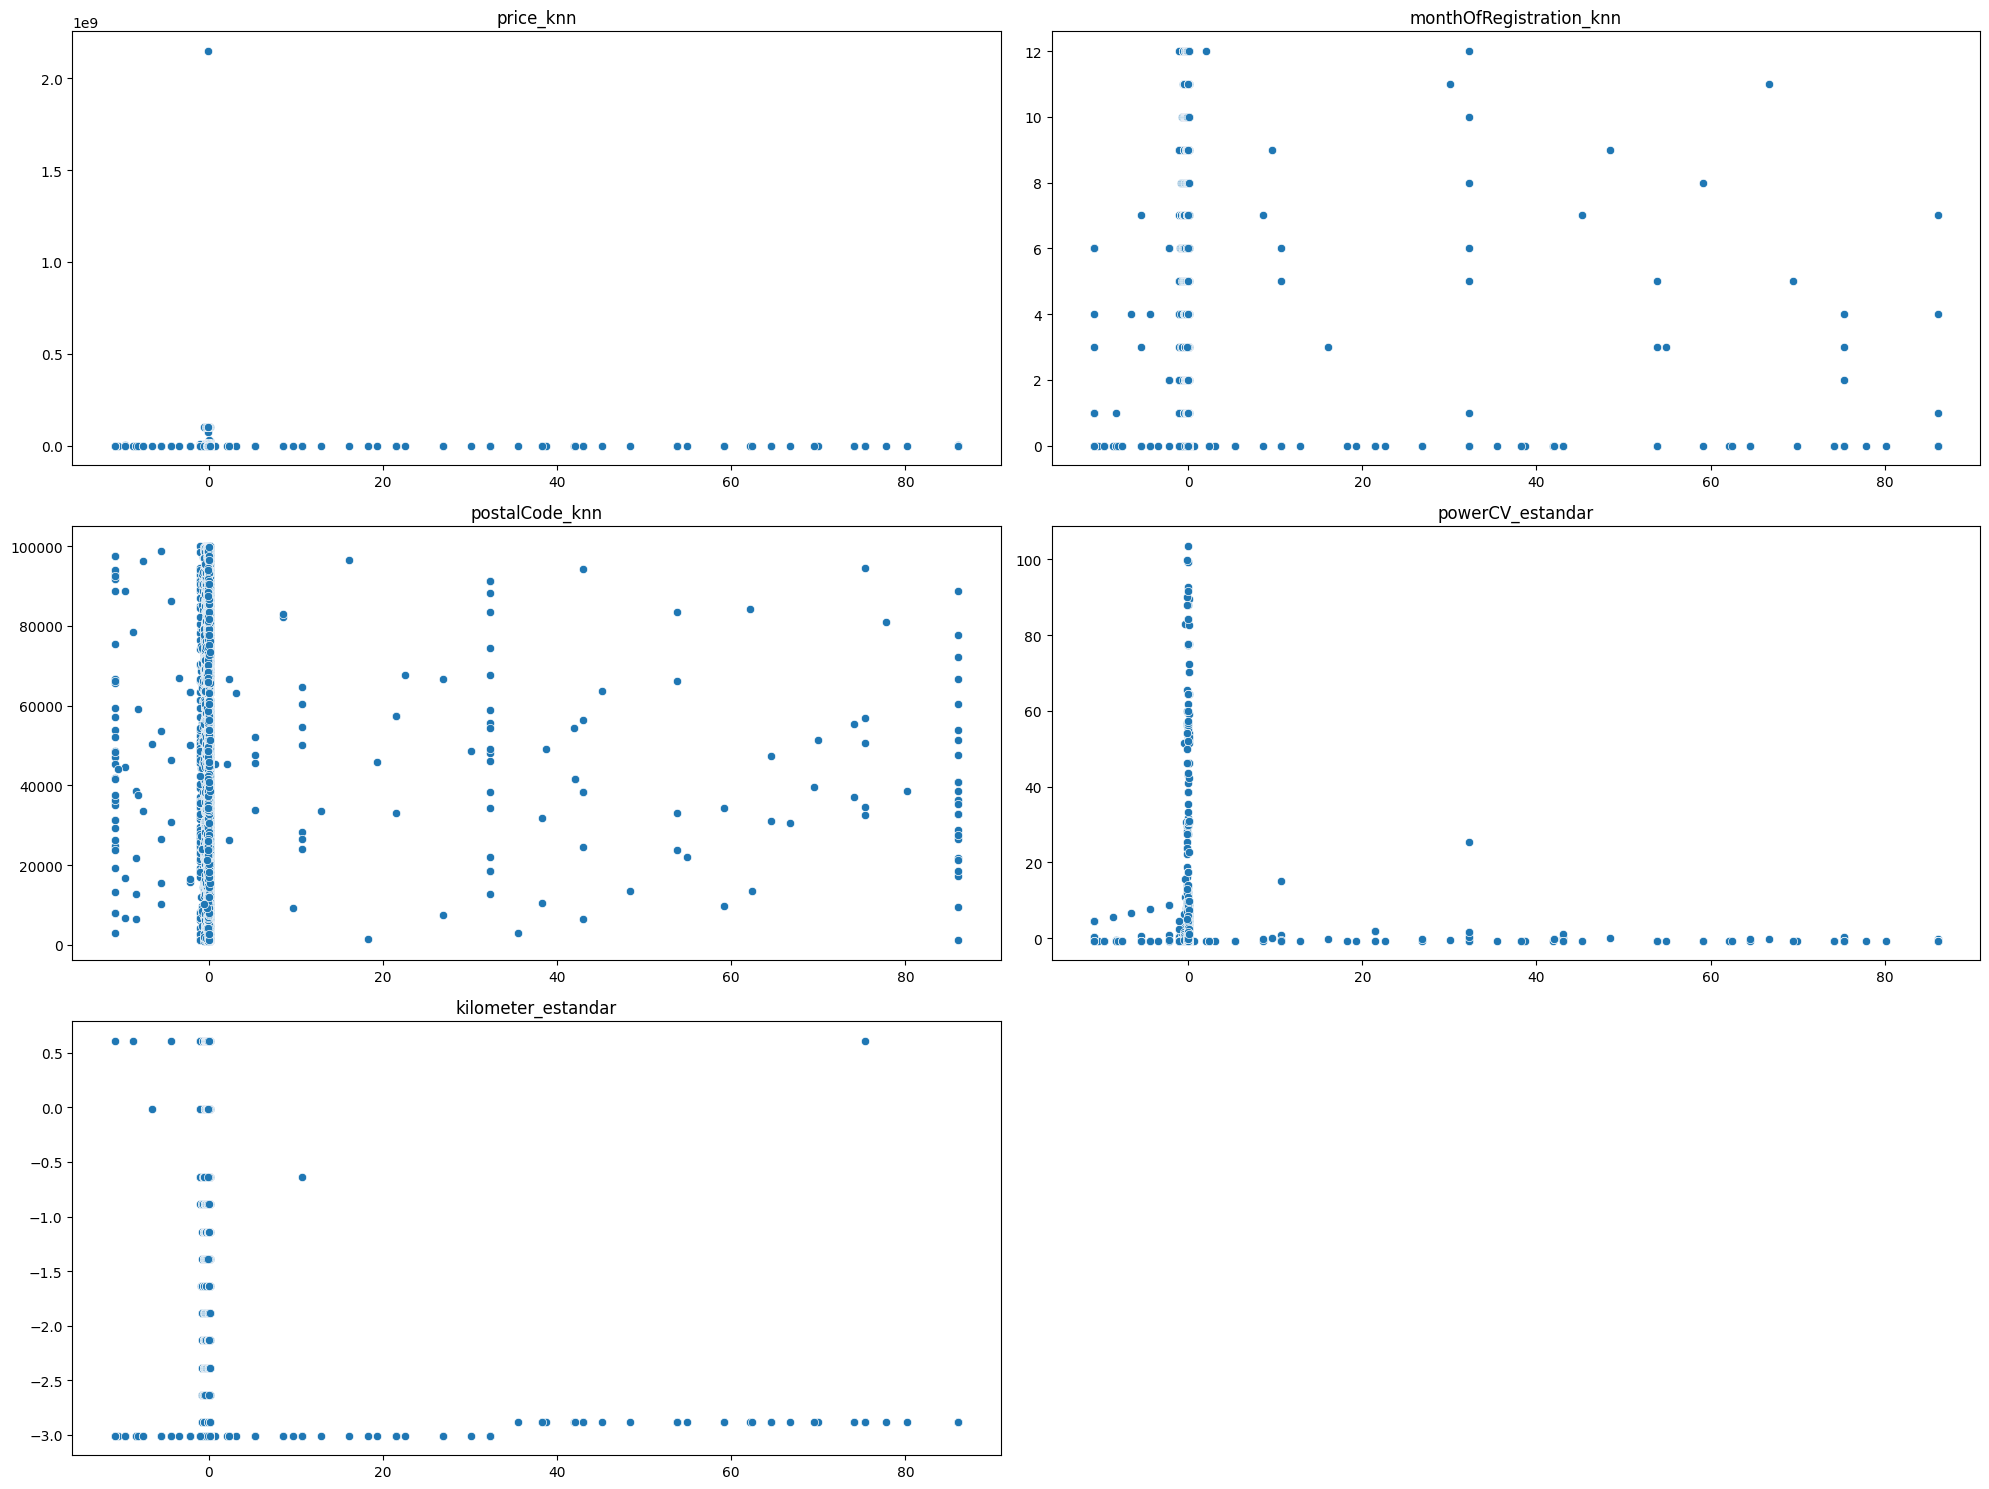

In [11]:
# llamamos al método que nos permite identificar los outliers
#La cantidad de outliers que tenemos para la columna yearOfRegistration_estandar es 7143
gestion_multi.visualizar_outliers_bivariados("yearOfRegistration_estandar")

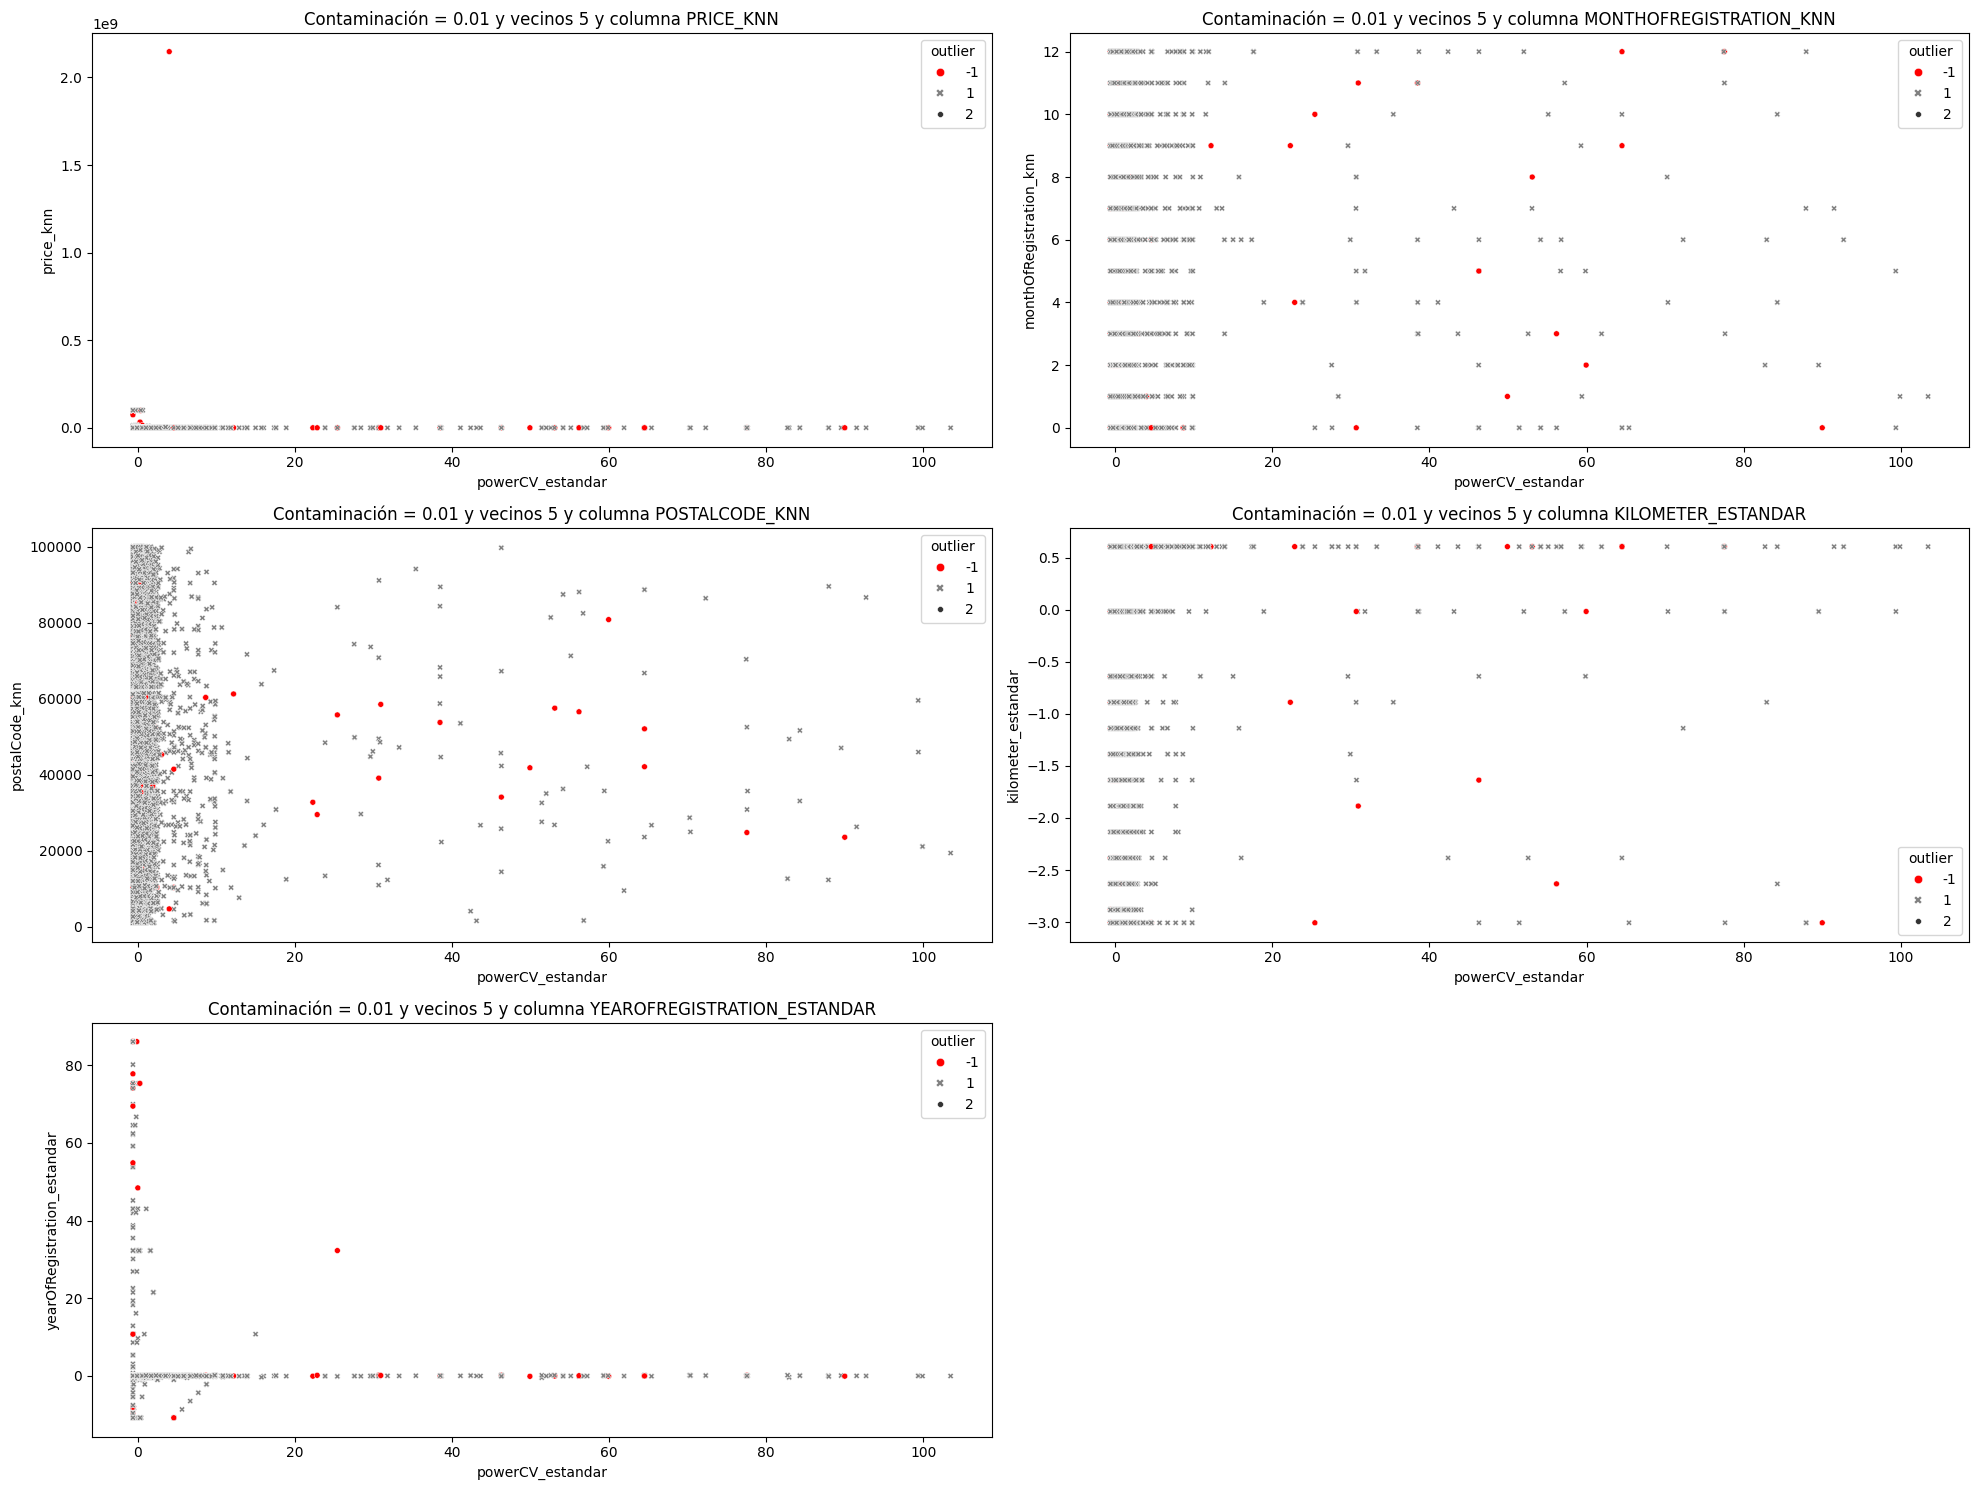

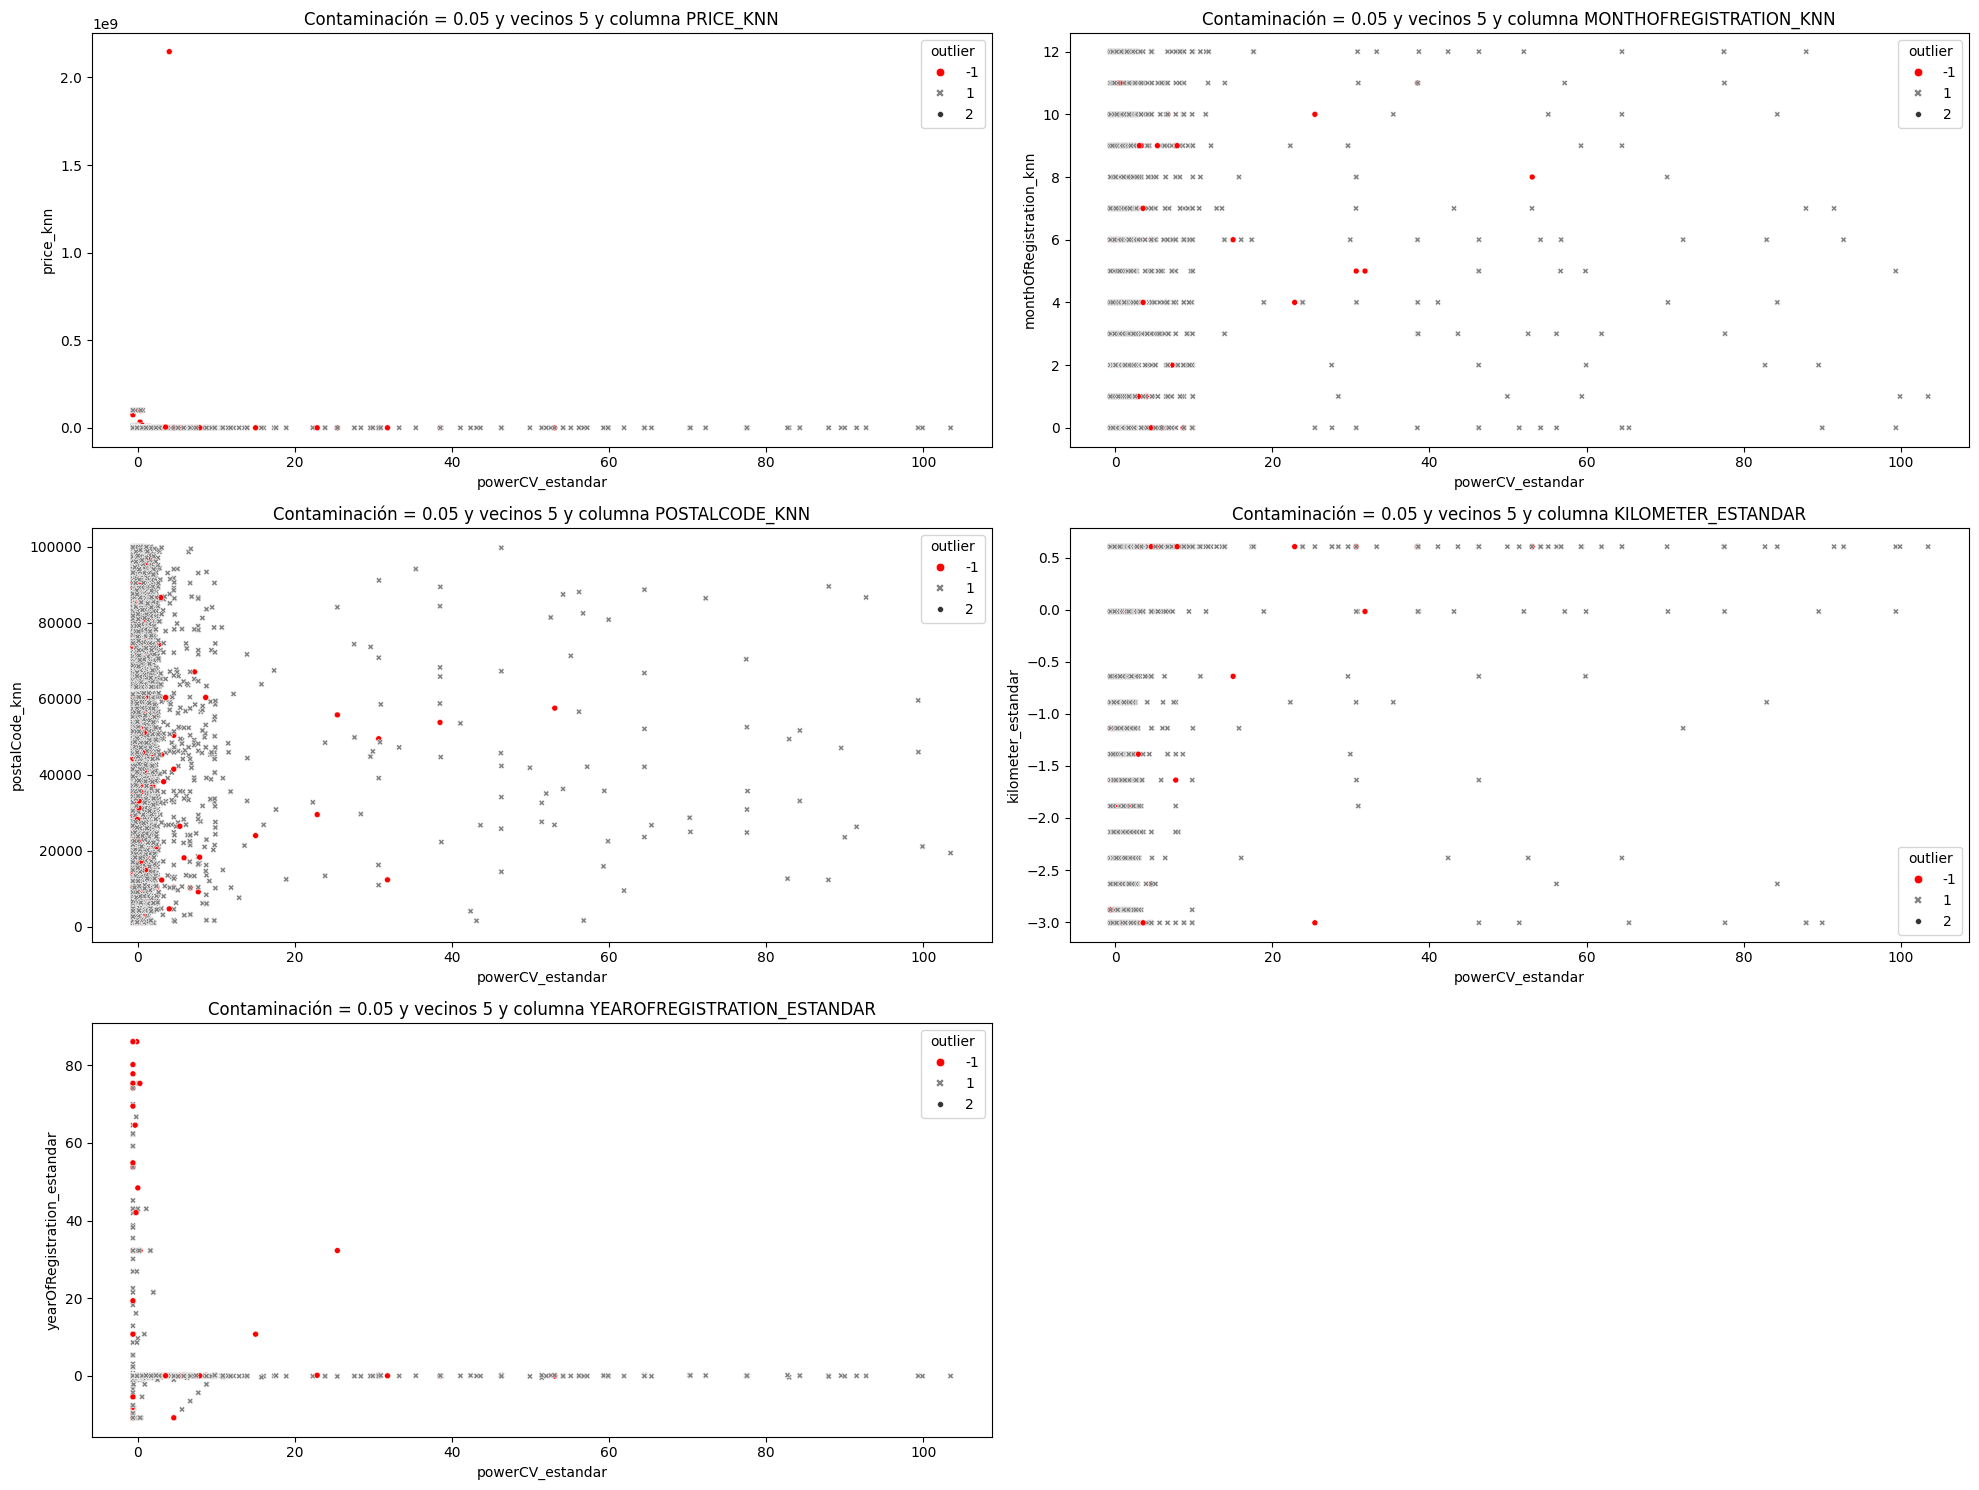

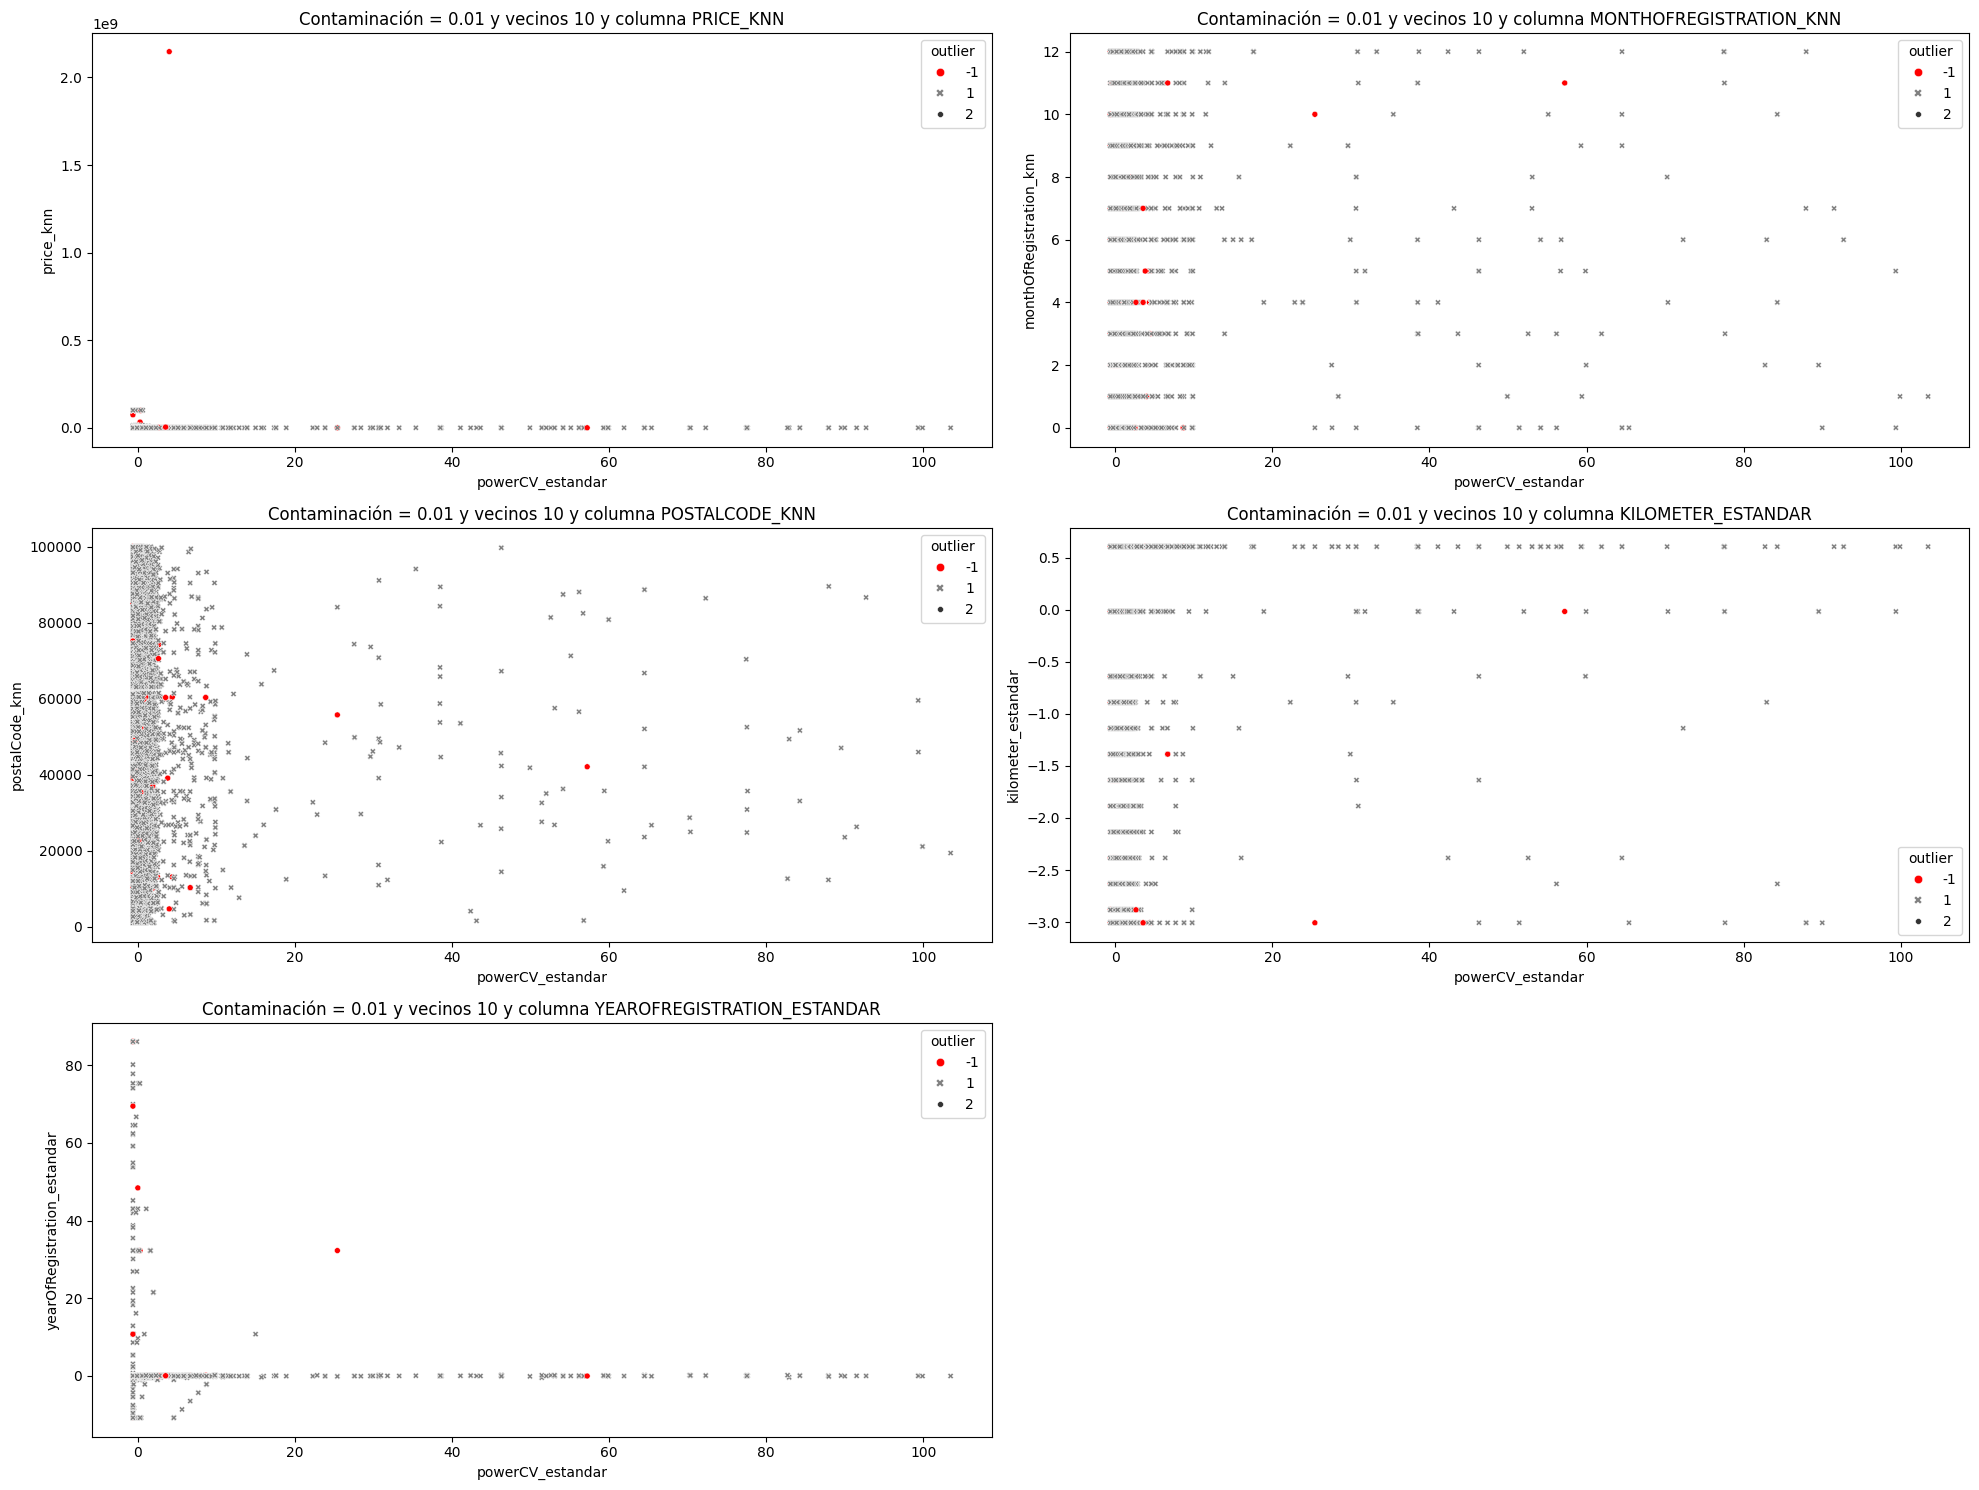

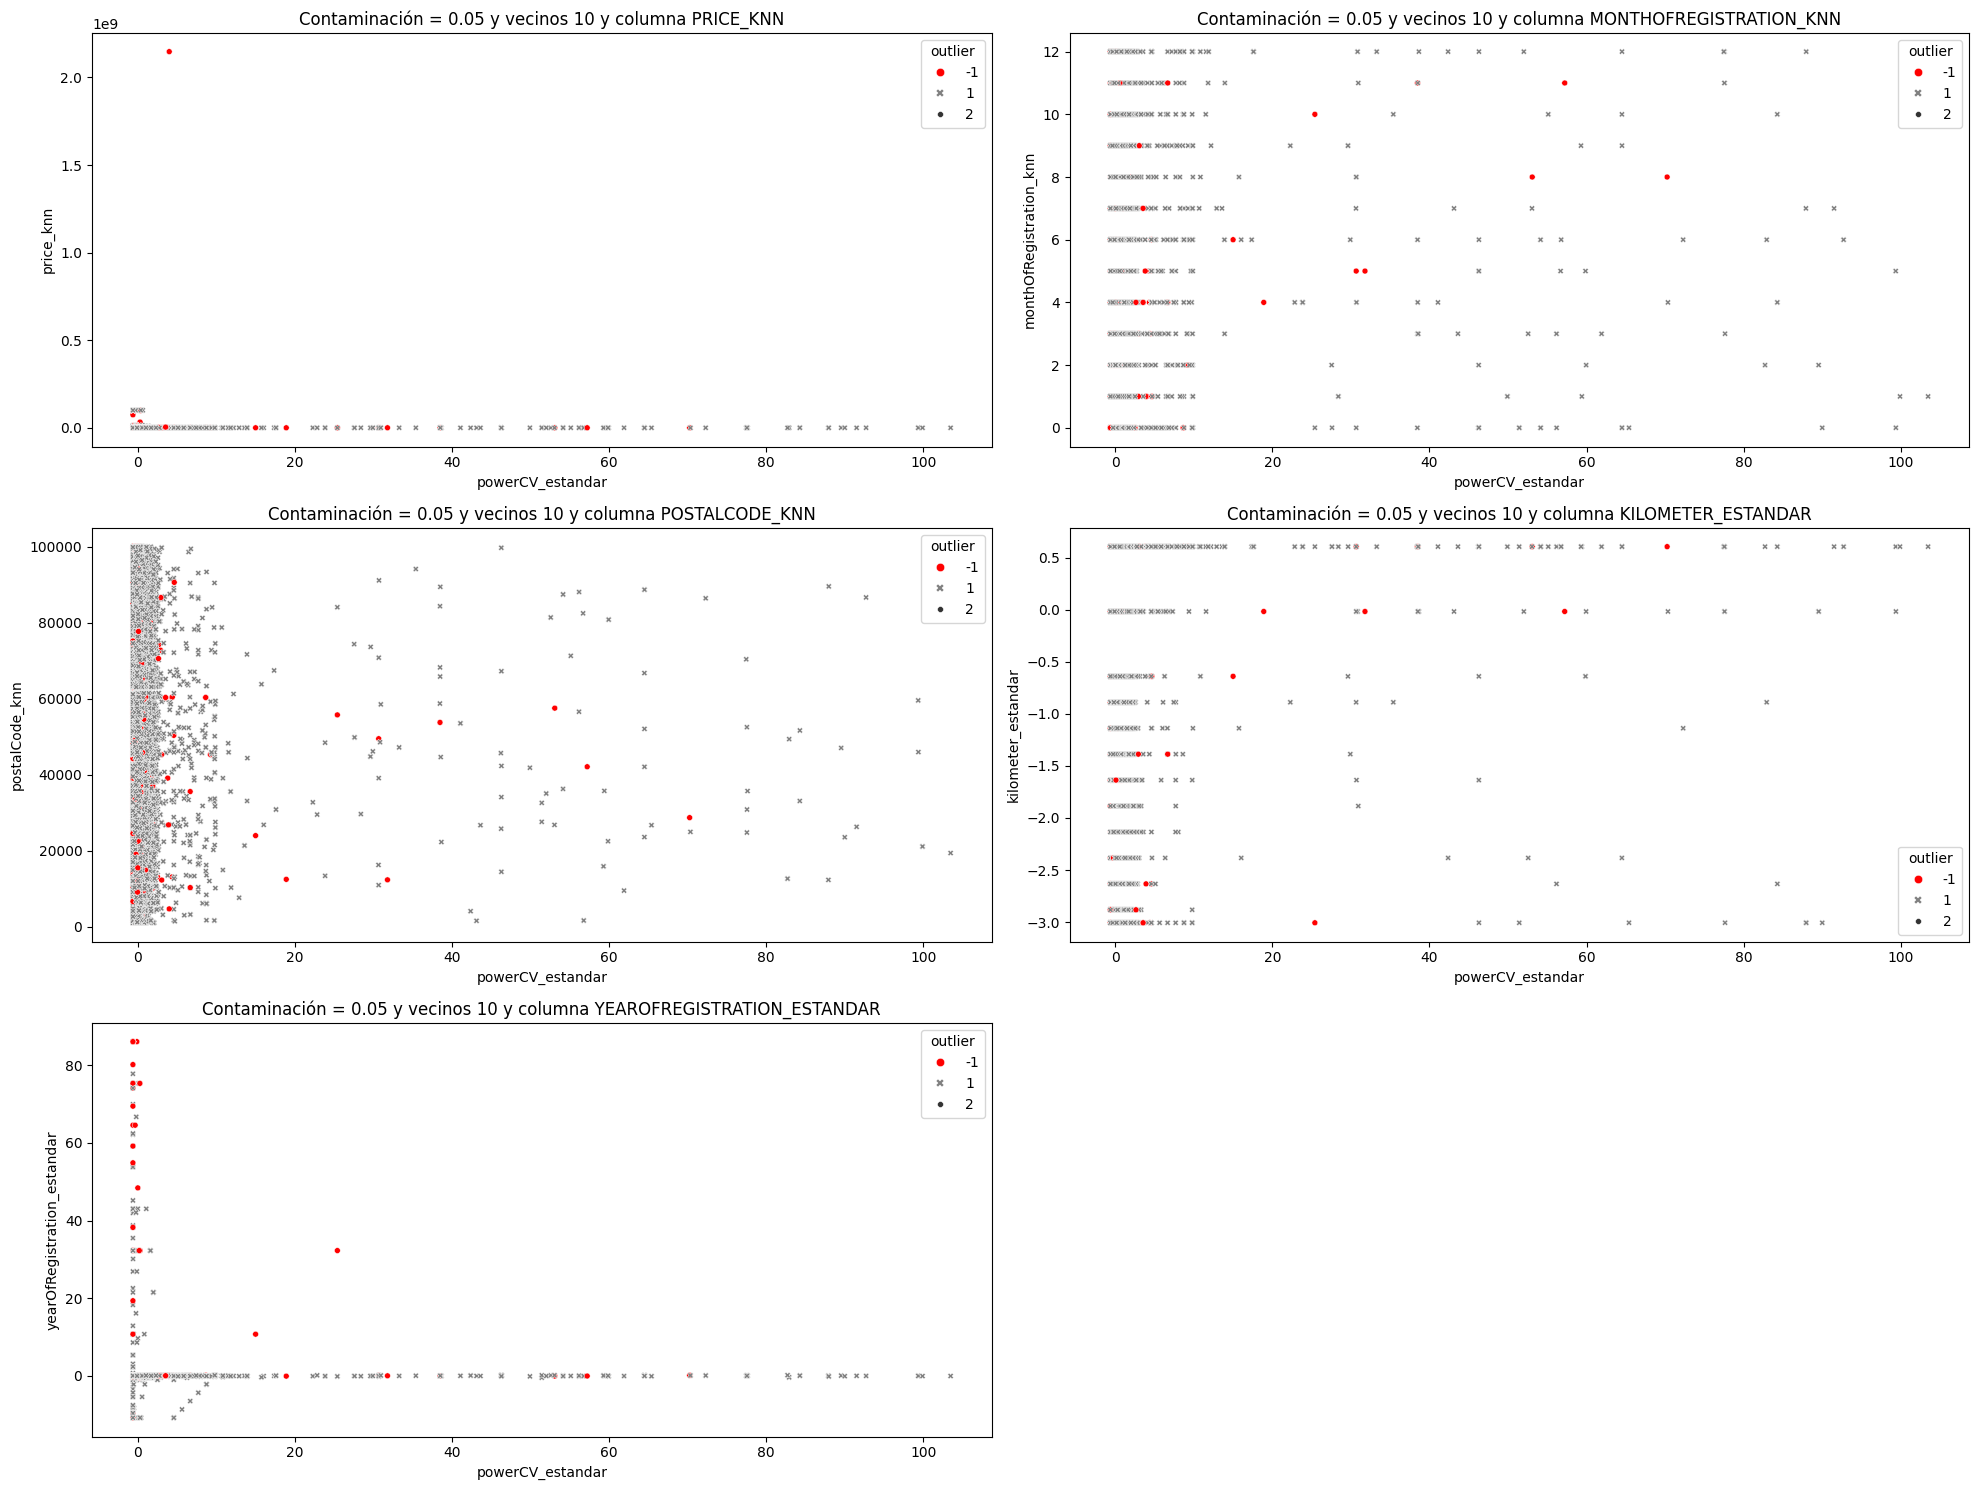

In [12]:
gestion_multi.explorar_outliers_lof("powerCV_estandar", indice_contaminacion=[0.01, 0.05], vecinos=[5,10])

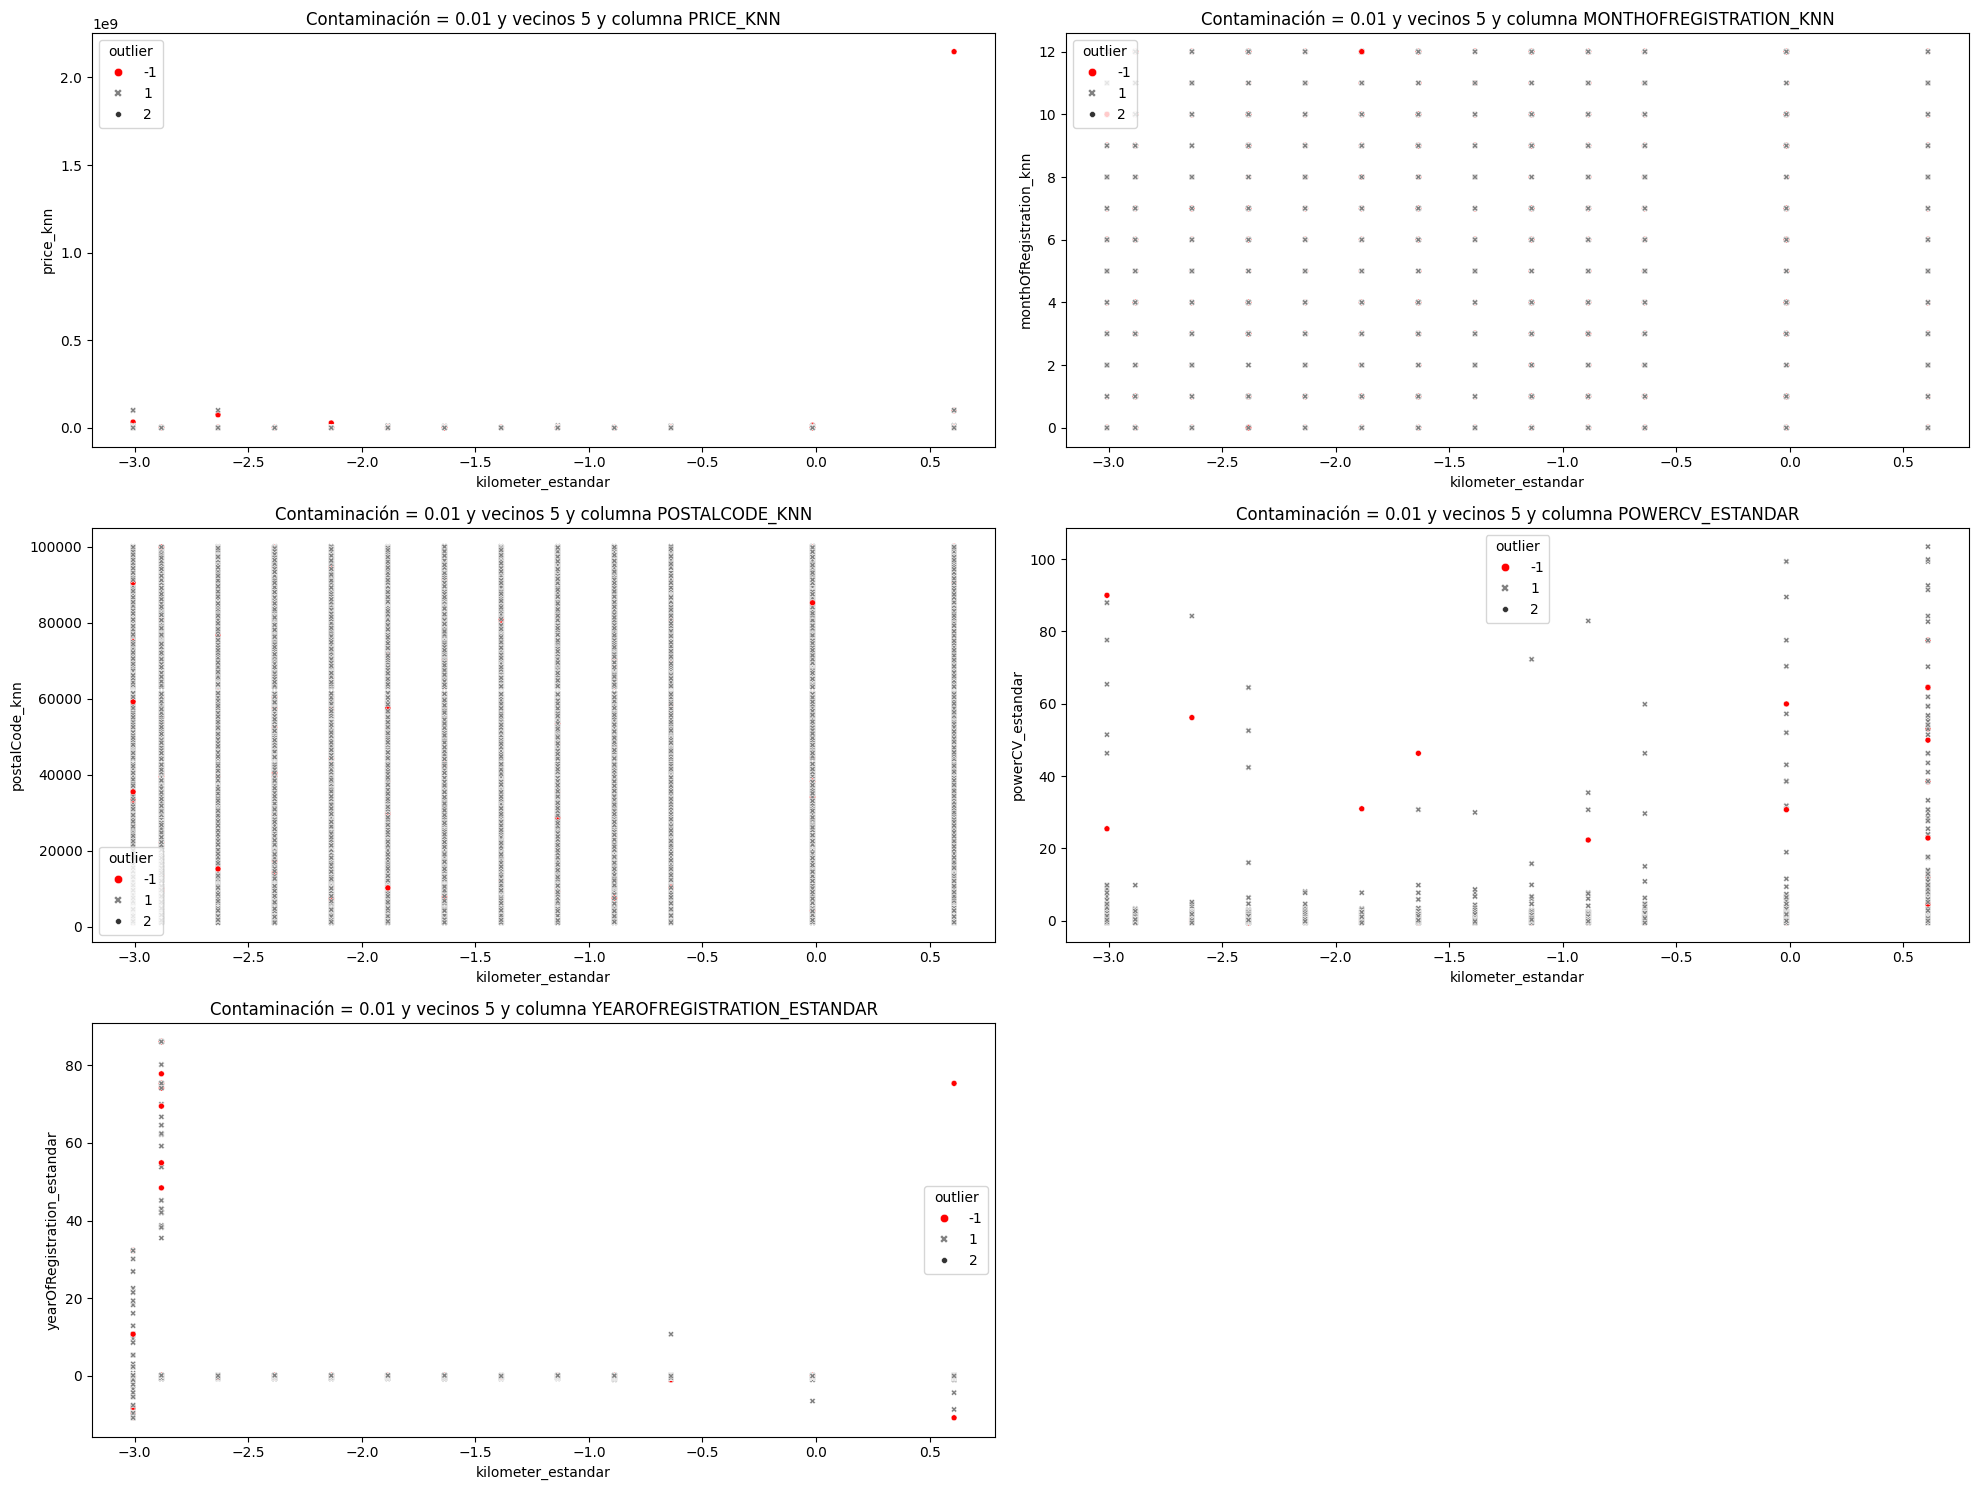

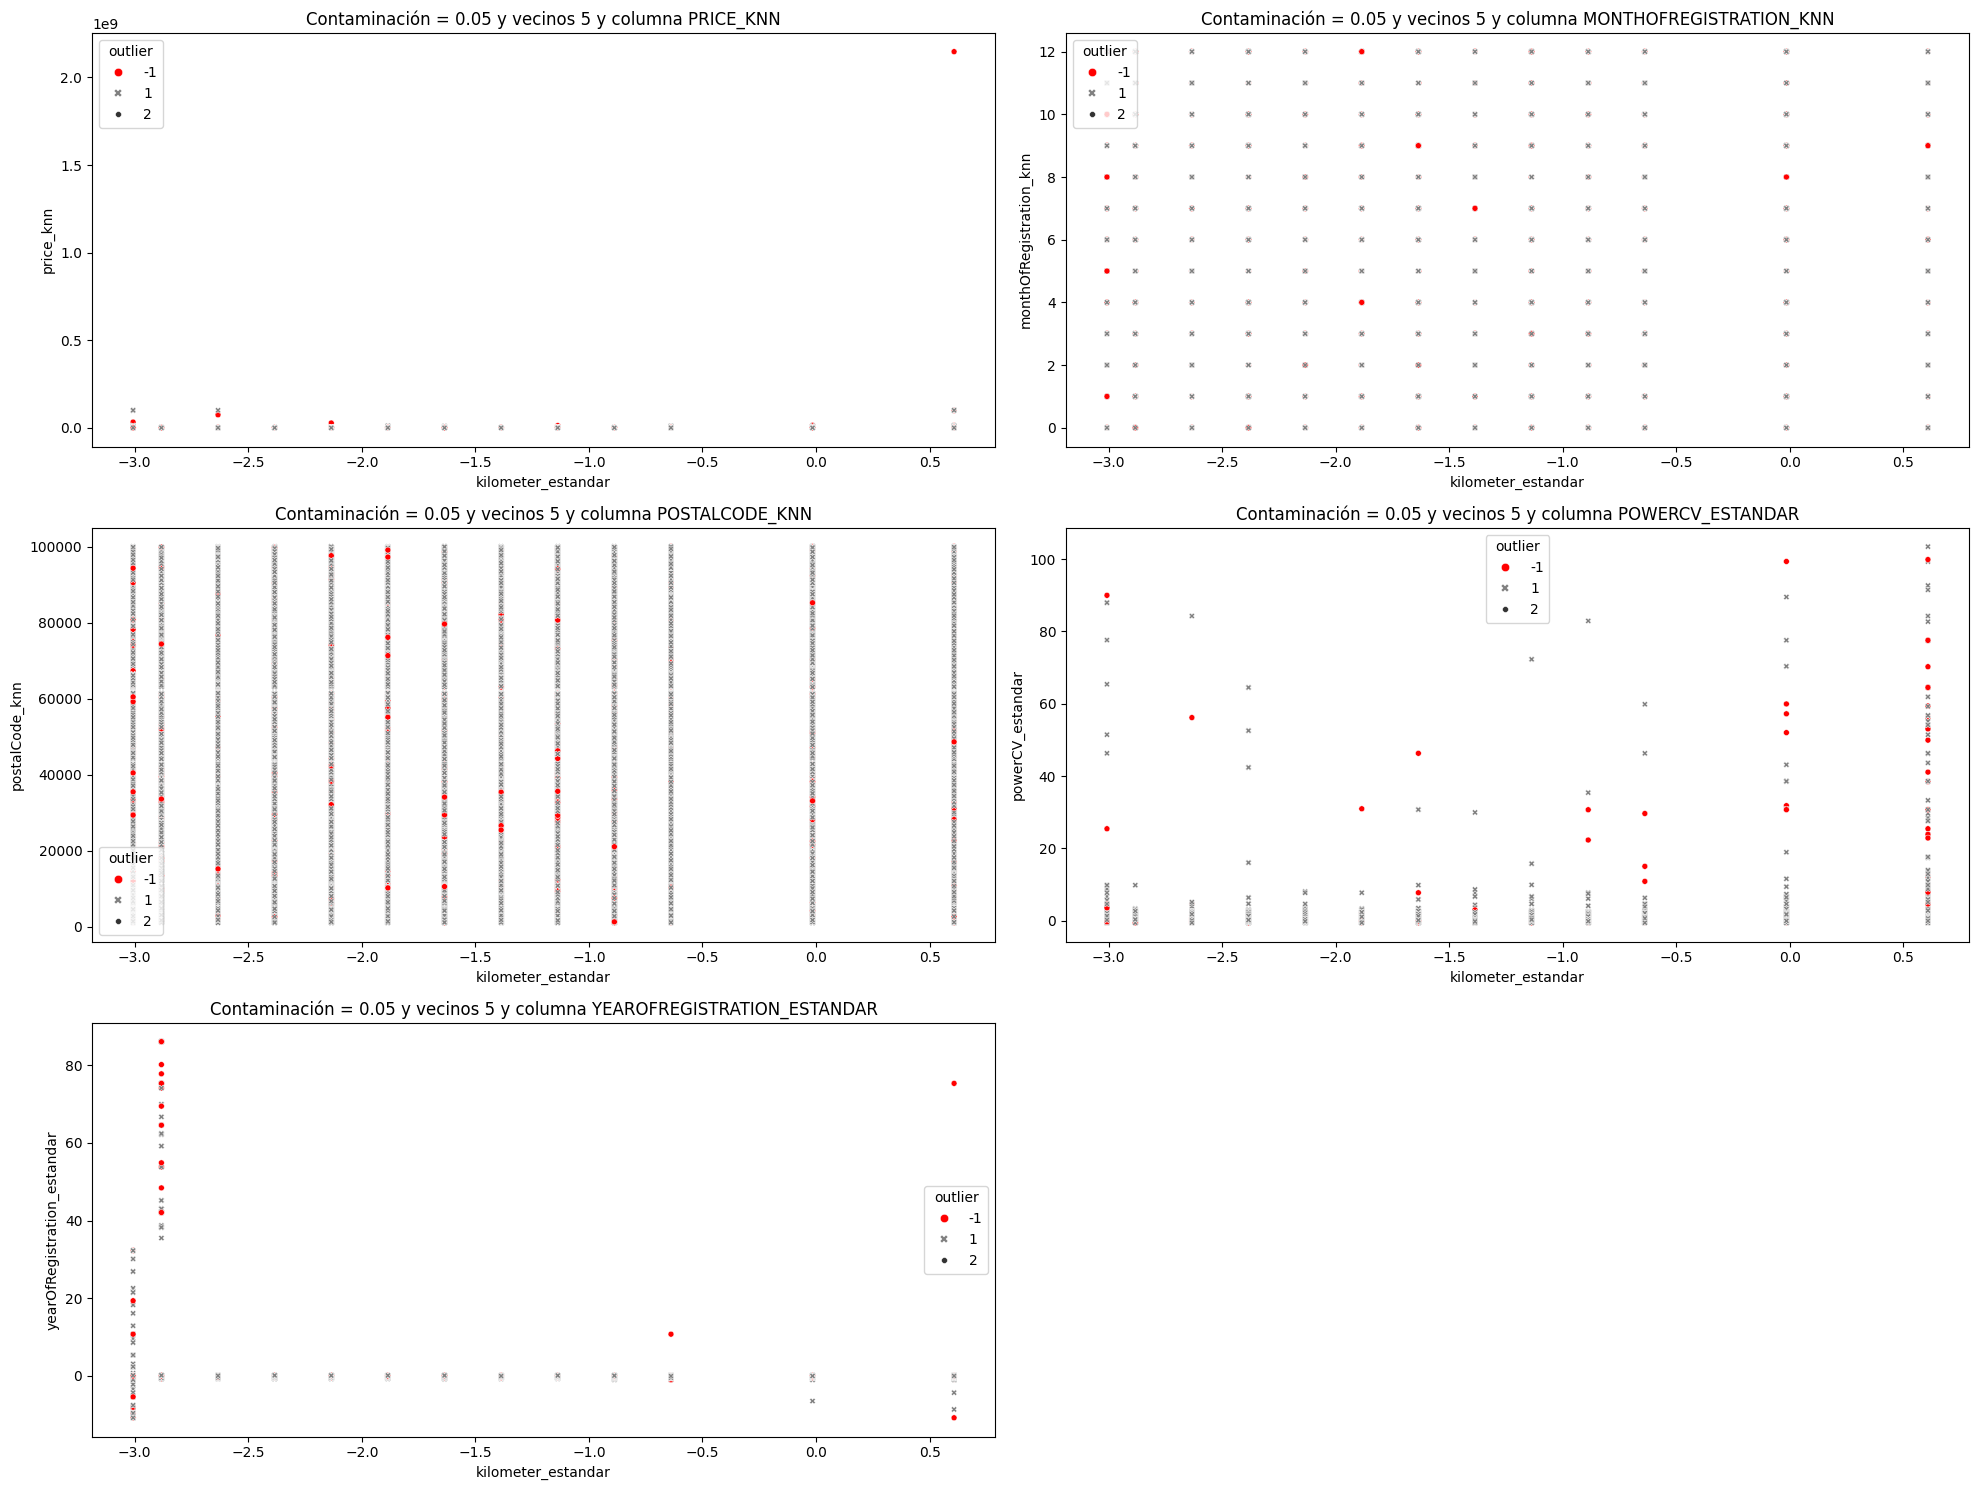

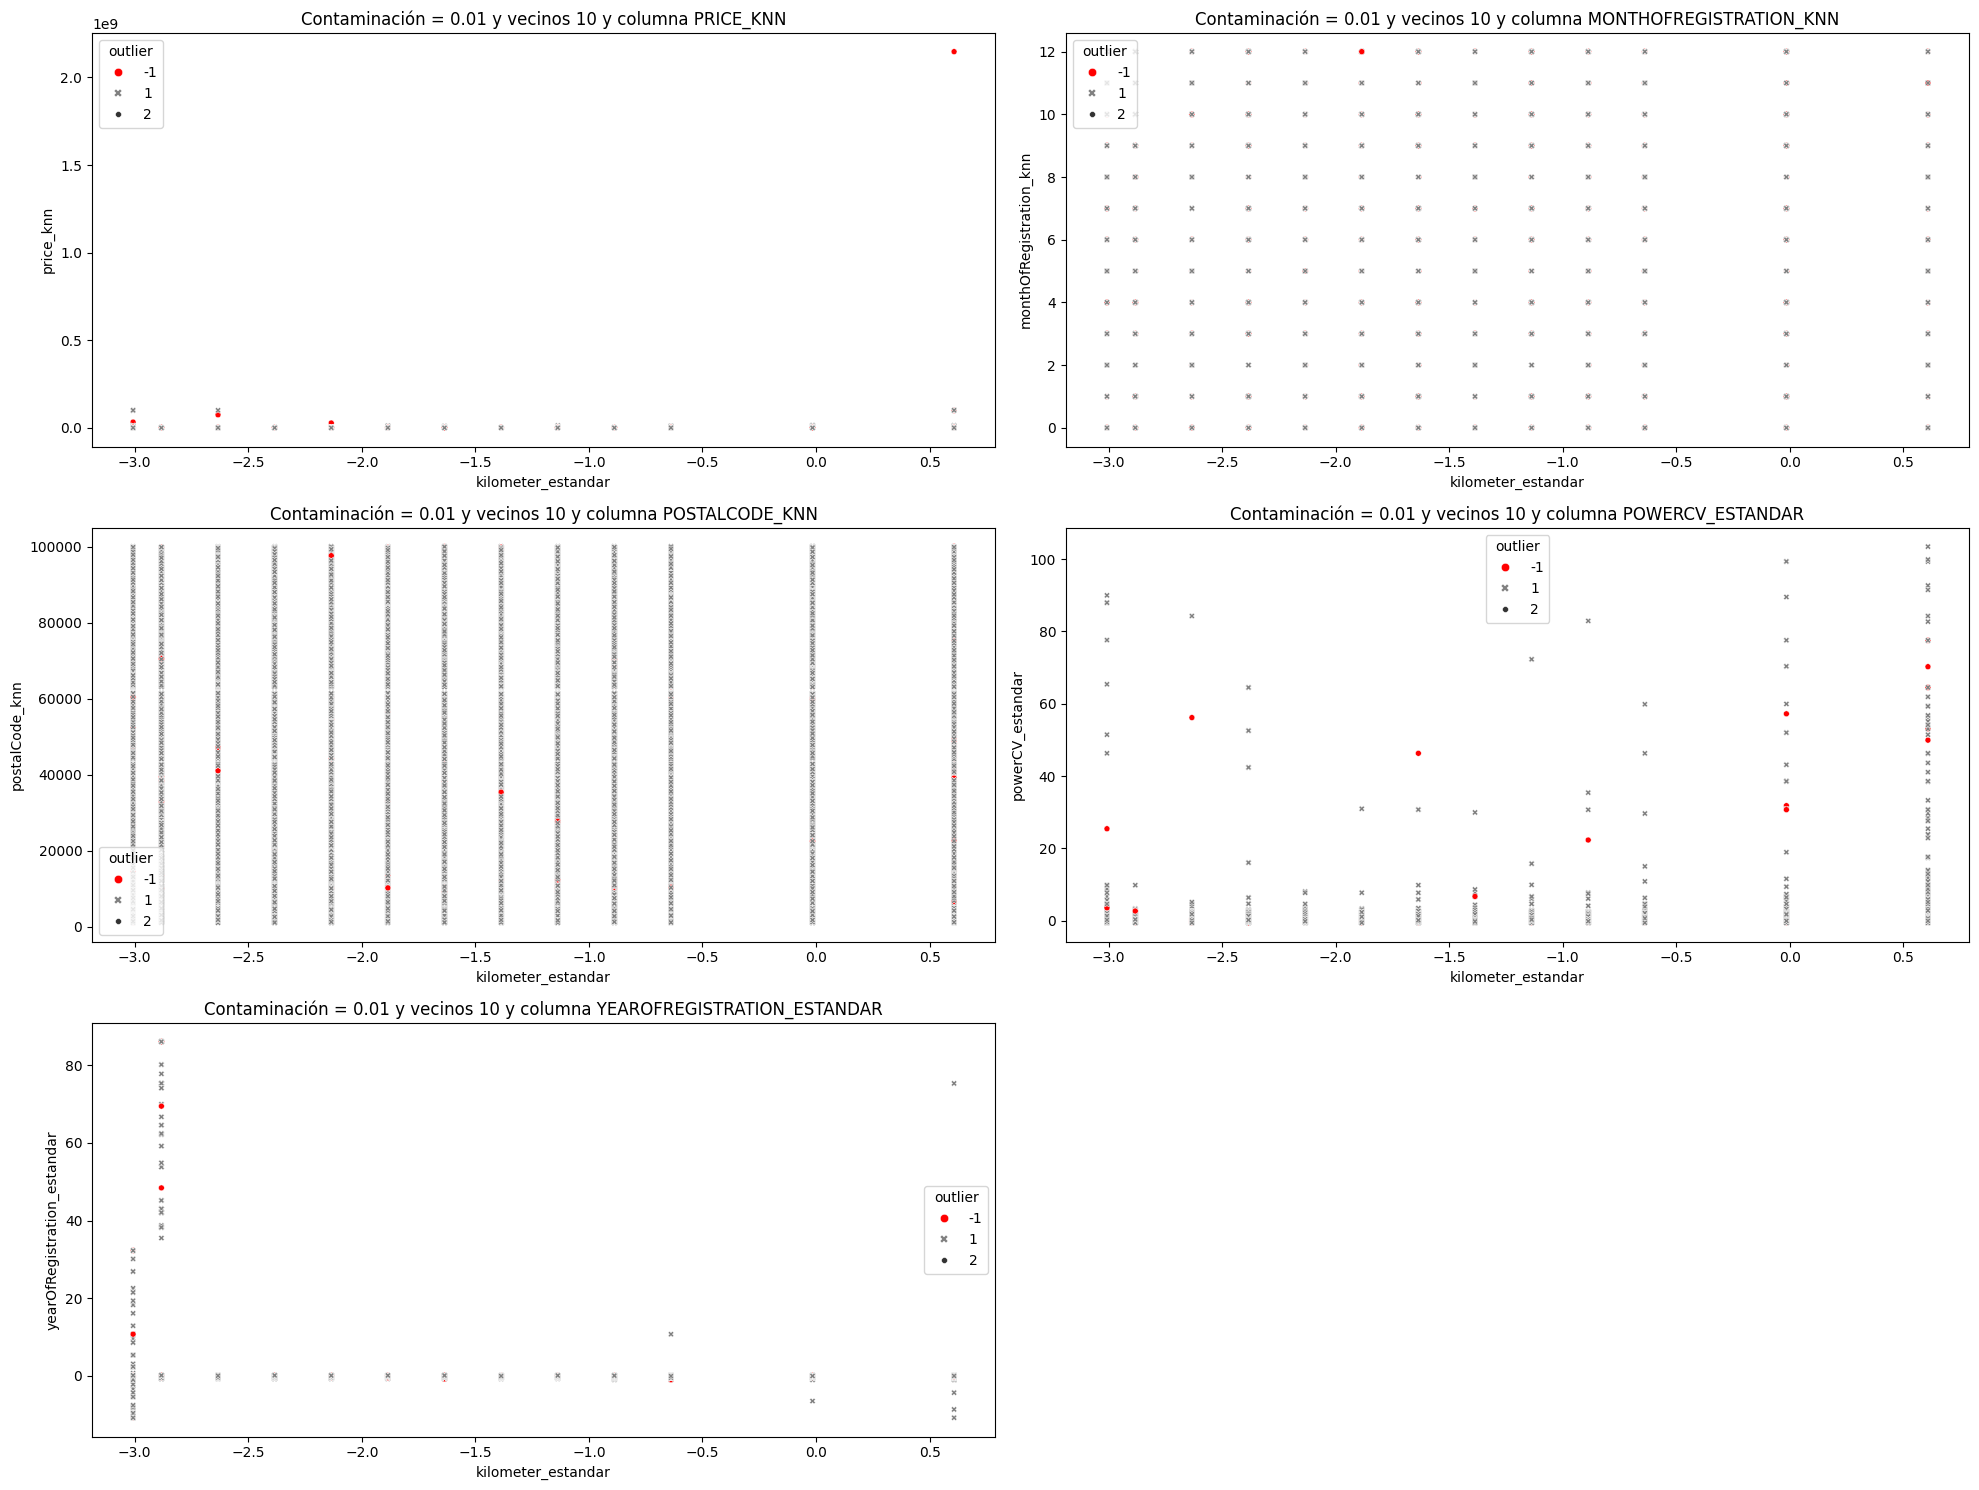

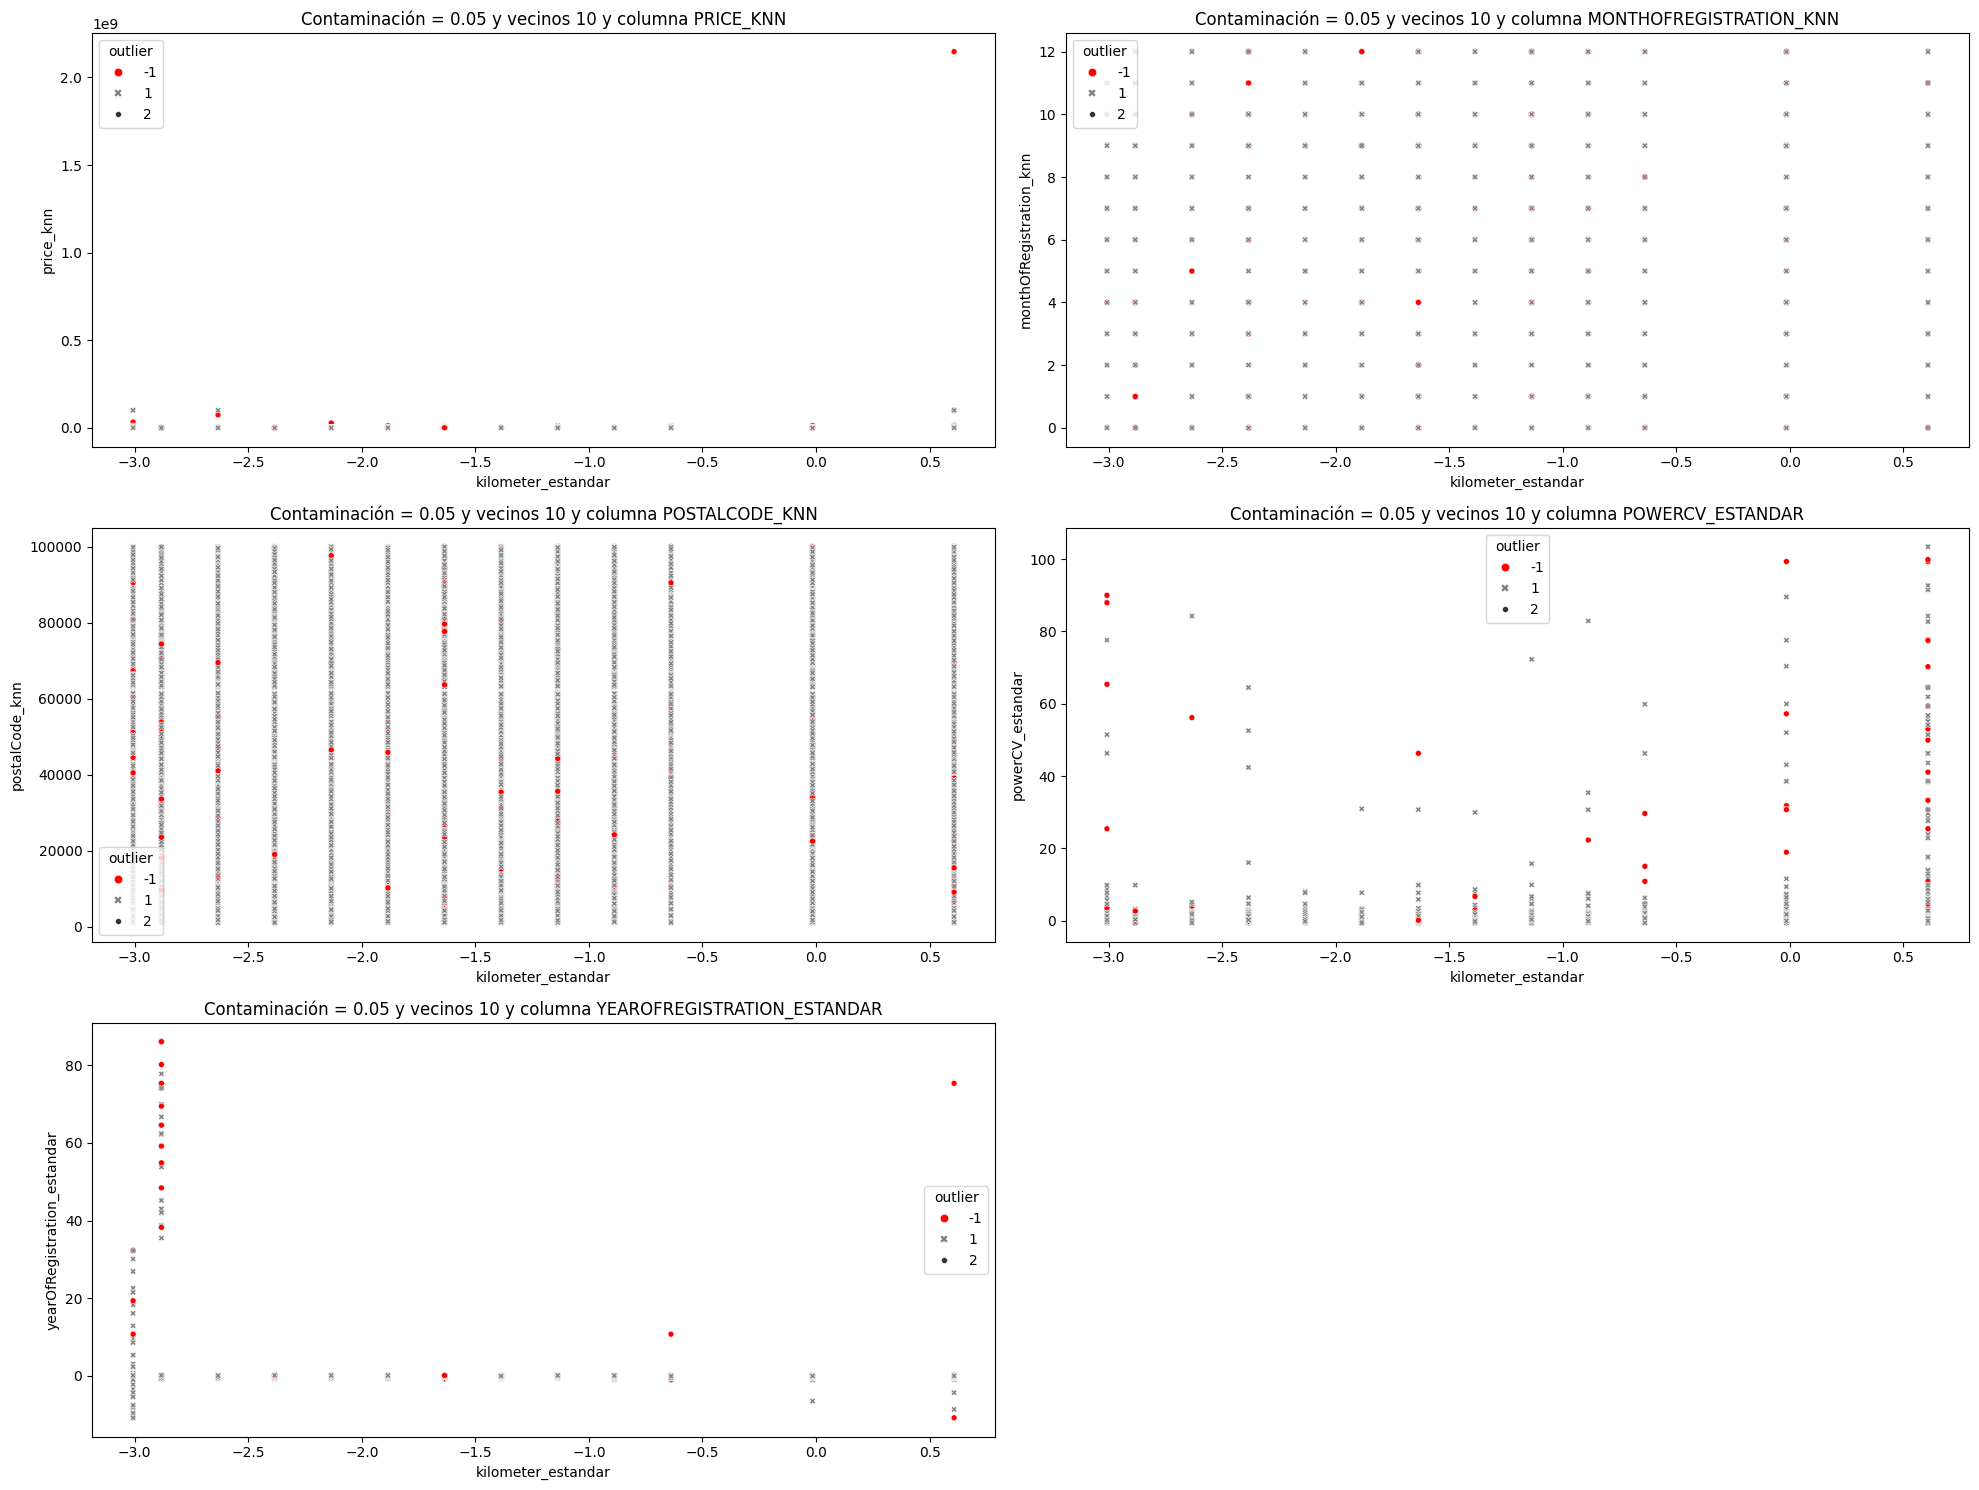

In [13]:
gestion_multi.explorar_outliers_lof("kilometer_estandar", indice_contaminacion=[0.01, 0.05], vecinos=[5,10])

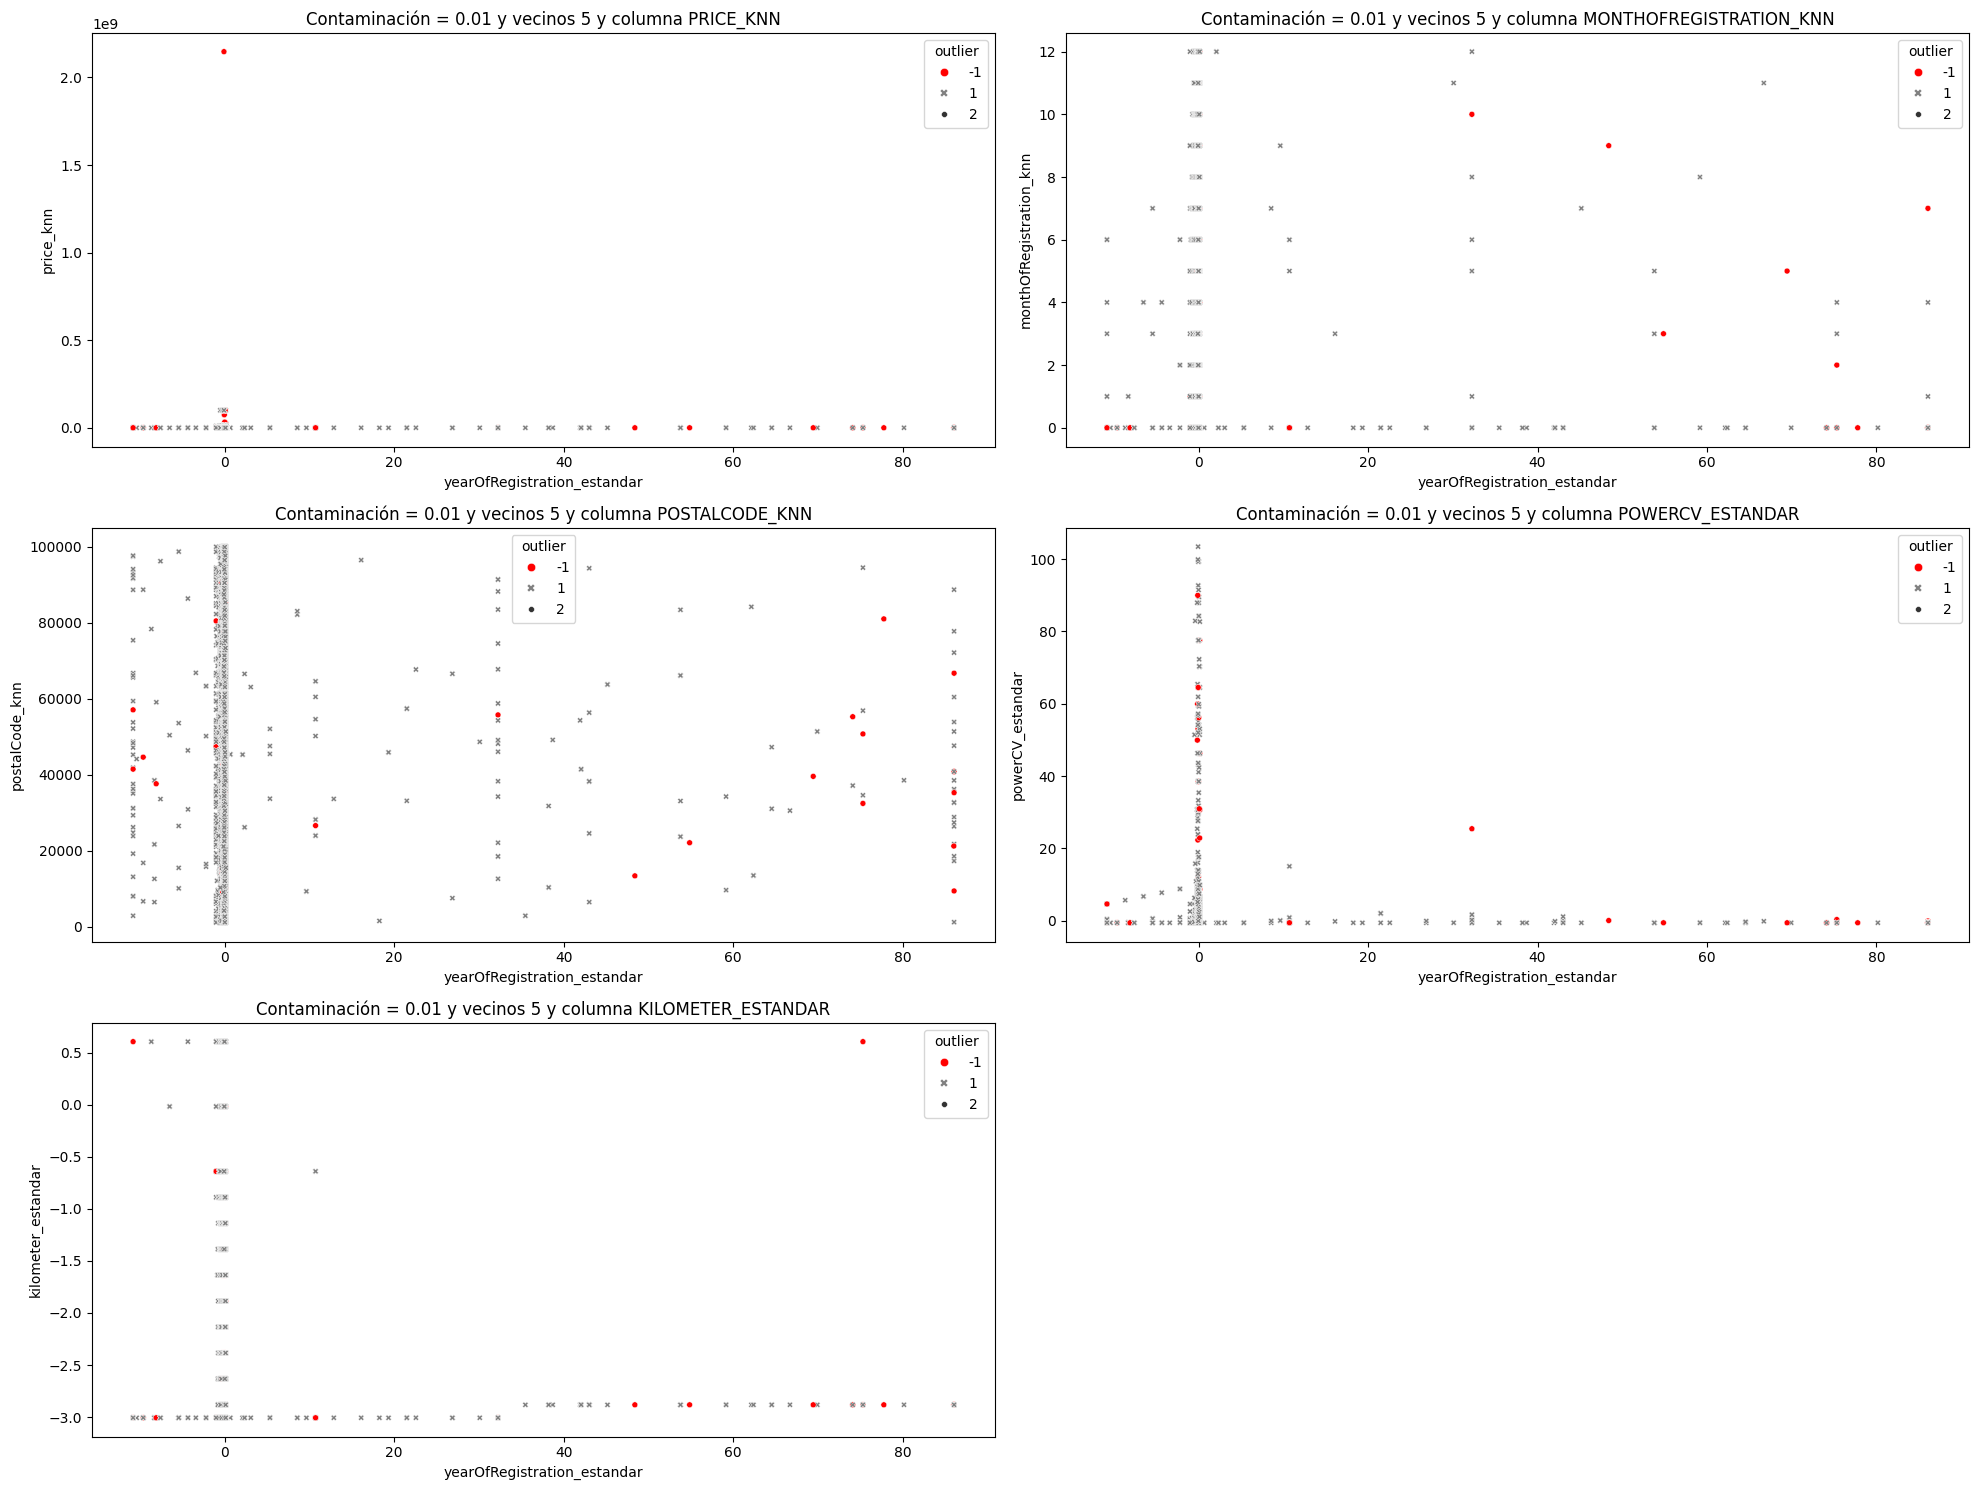

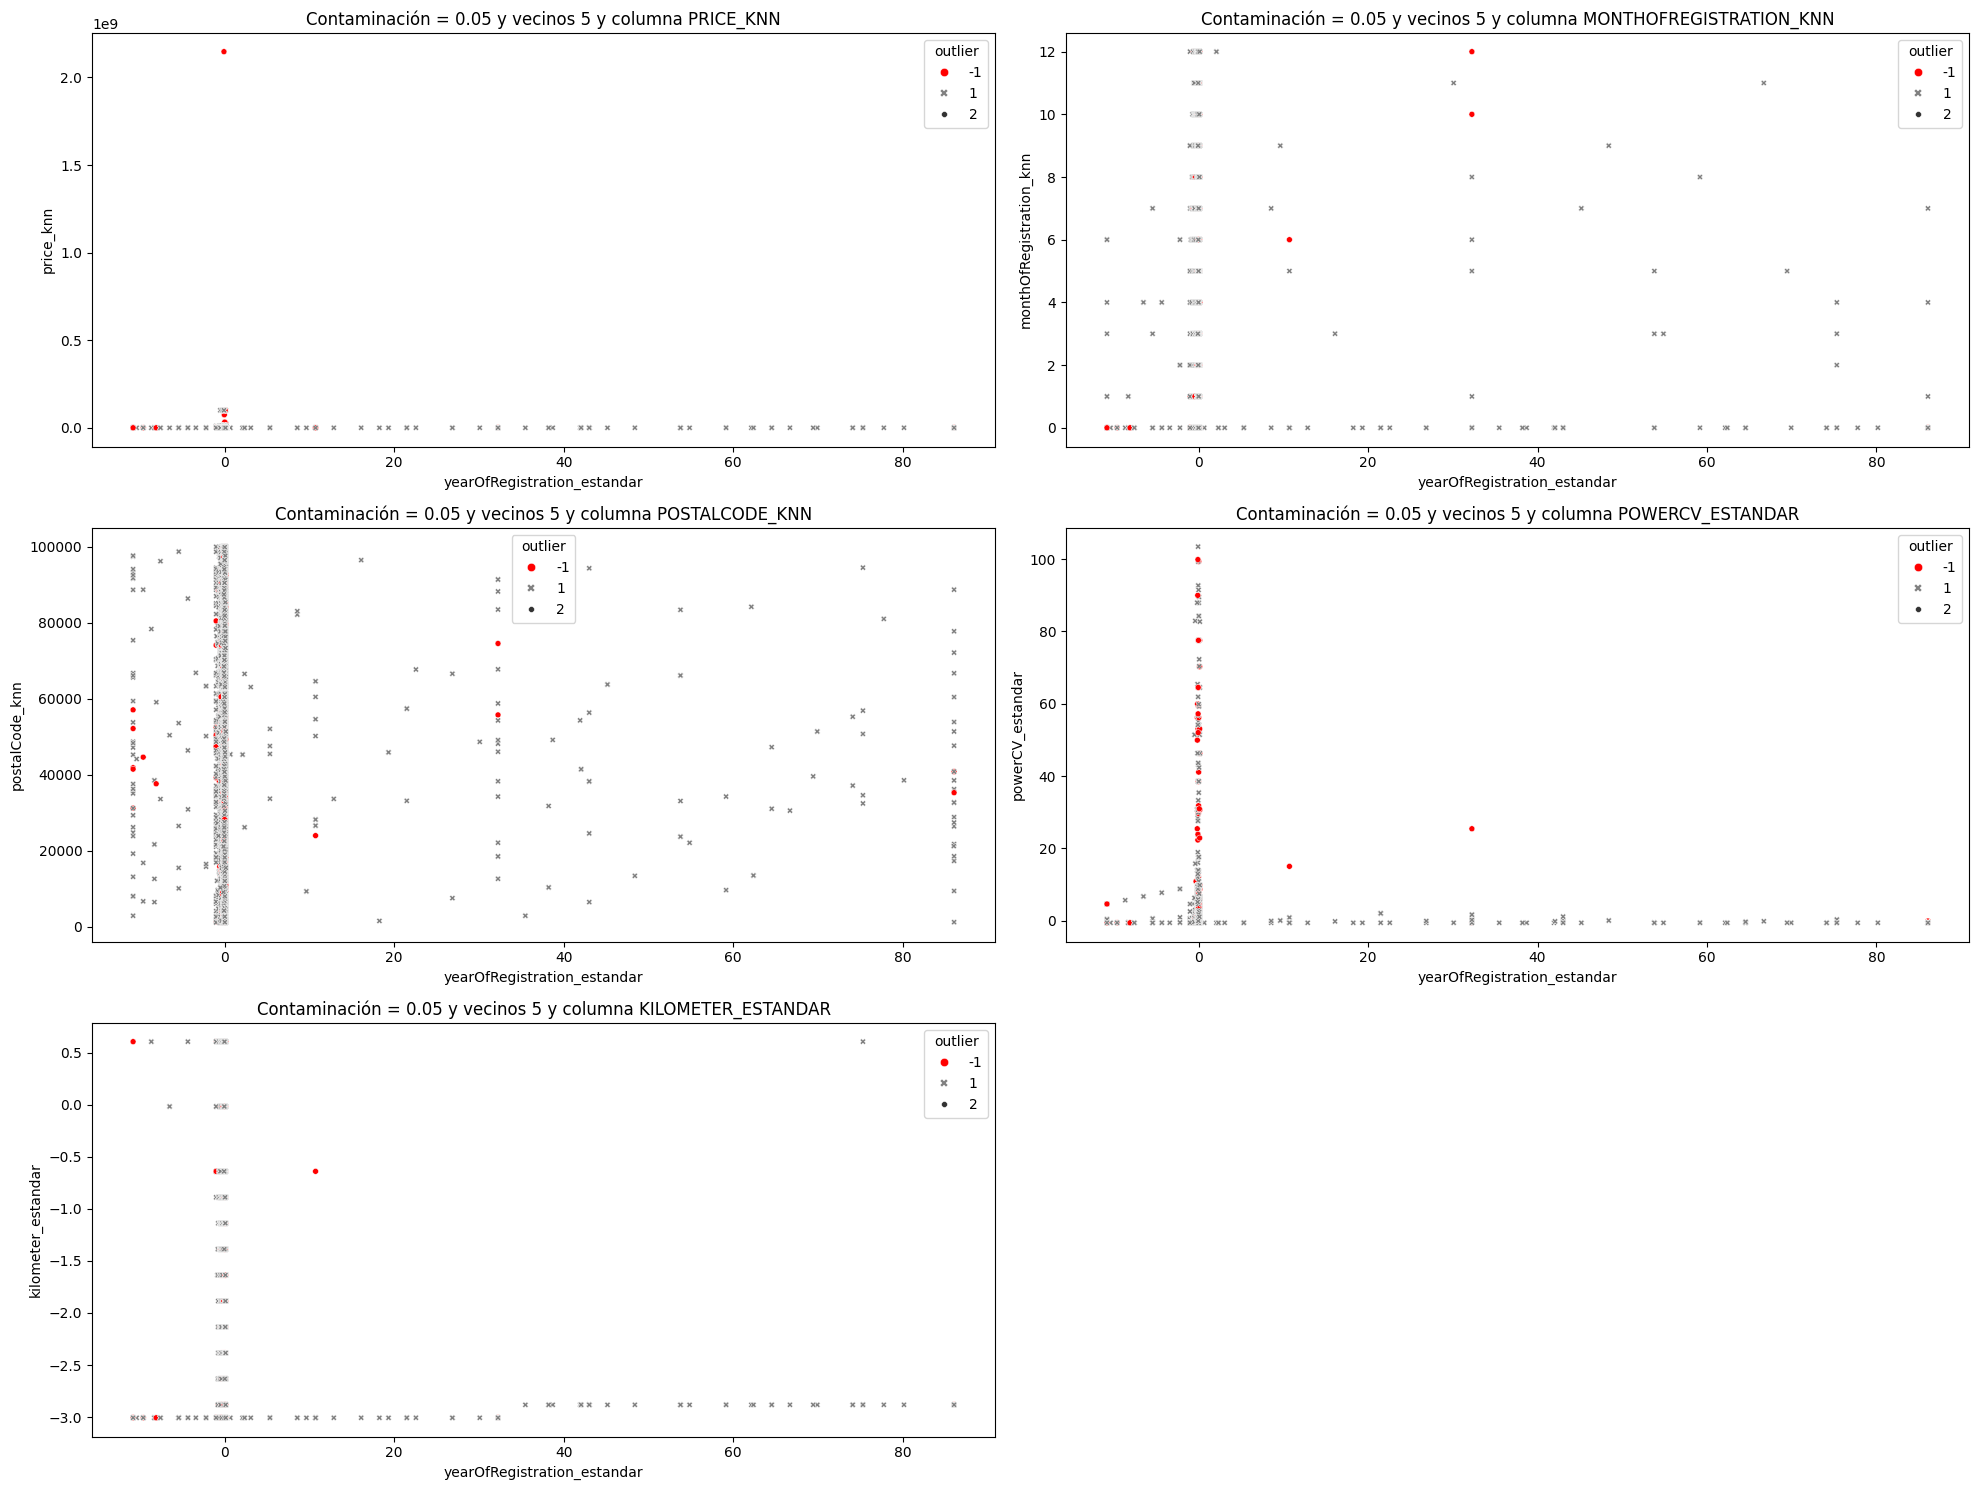

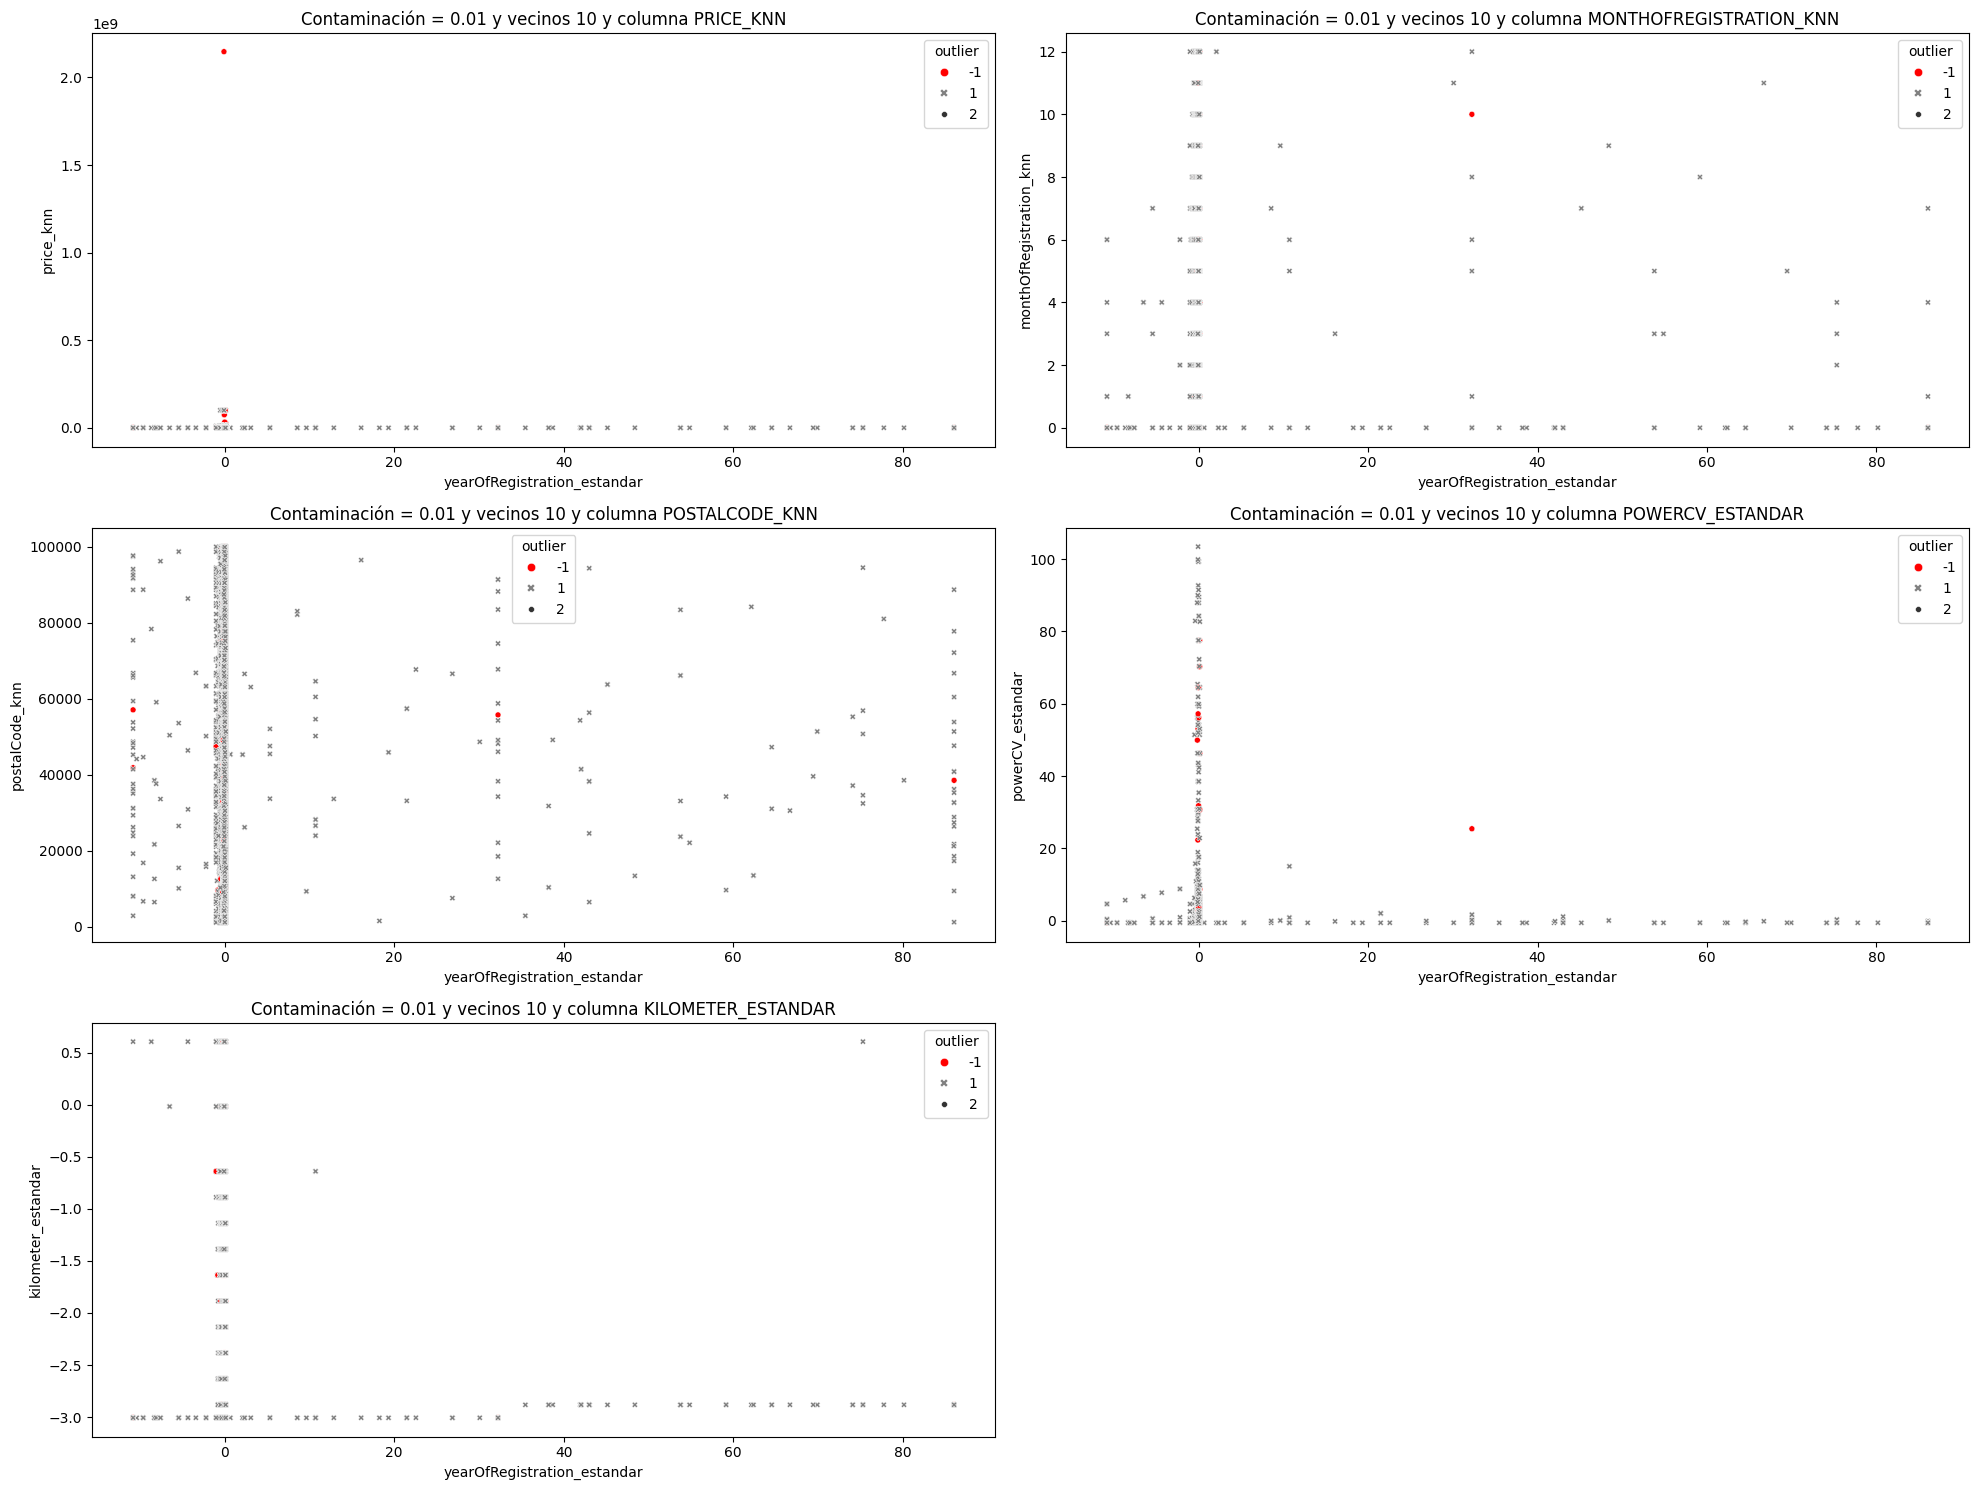

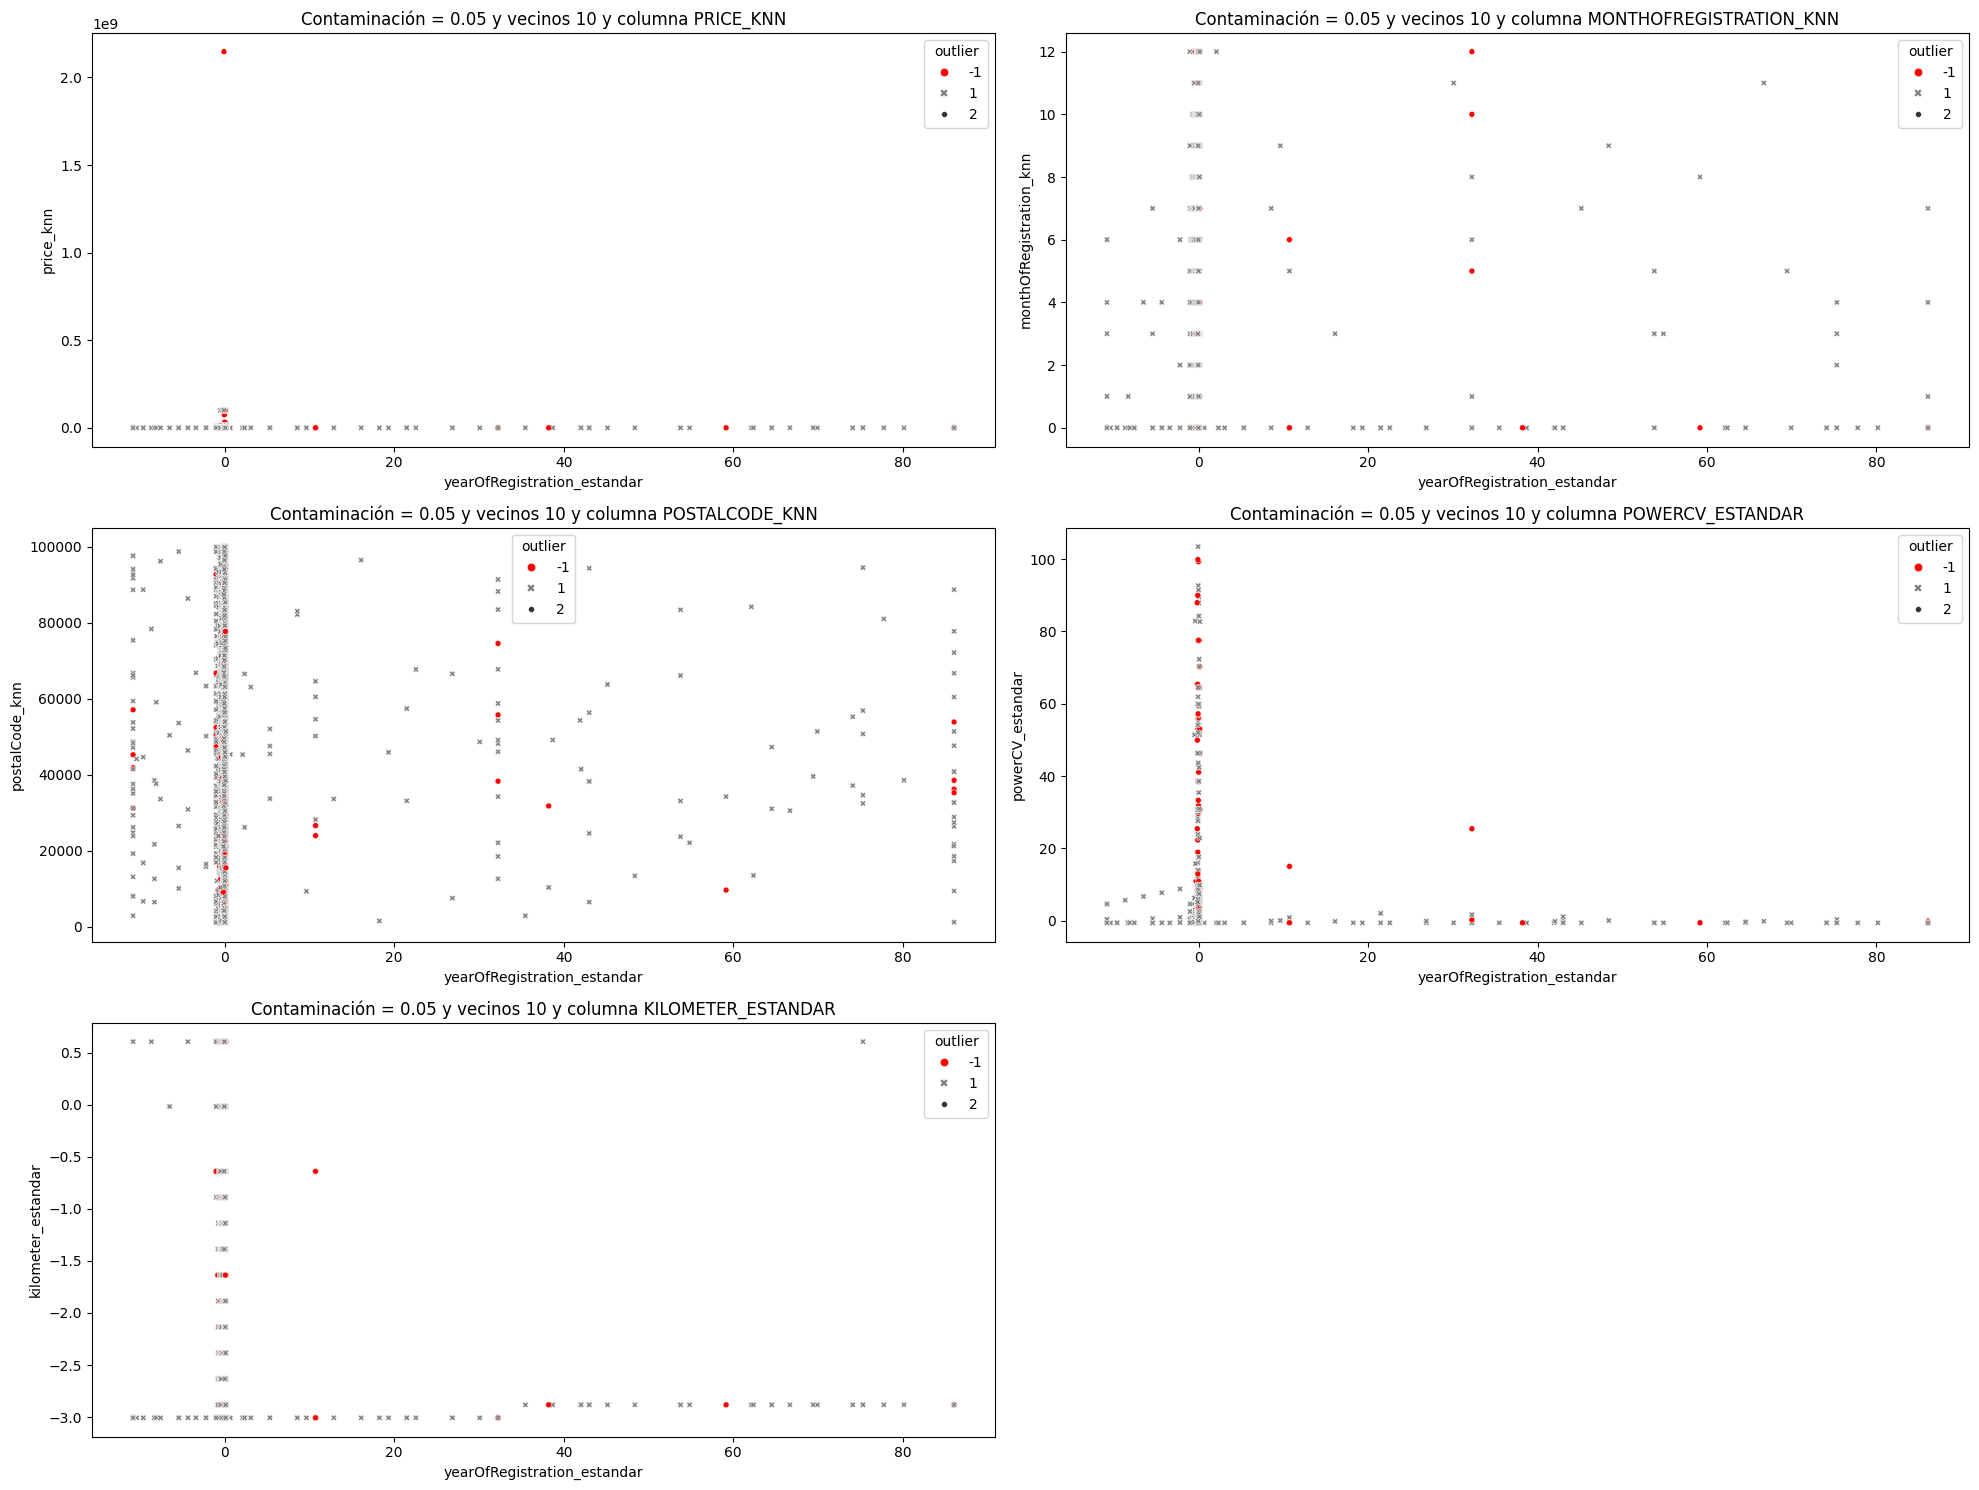

In [14]:
gestion_multi.explorar_outliers_lof("yearOfRegistration_estandar", indice_contaminacion=[0.01, 0.05], vecinos=[5,10])